Import necessary libraries.

In [26]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

In [46]:
plant_1_gen = pd.read_csv('../data/Plant_1_Generation_Data.csv')
plant_1_weat = pd.read_csv('../data/Plant_1_Weather_Sensor_Data.csv')

# Convert DATR_TIME from string to datetime
plant_1_gen['DATE_TIME'] = pd.to_datetime(plant_1_gen['DATE_TIME'])
plant_1_weat['DATE_TIME'] = pd.to_datetime(plant_1_weat['DATE_TIME'])

In [28]:
plant_1_gen.head(10)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0
5,2020-05-15,4135001,VHMLBKoKgIrUVDU,0.0,0.0,0.0,7206408.0
6,2020-05-15,4135001,WRmjgnKYAwPKWDb,0.0,0.0,0.0,7028673.0
7,2020-05-15,4135001,ZnxXDlPa8U1GXgE,0.0,0.0,0.0,6522172.0
8,2020-05-15,4135001,ZoEaEvLYb1n2sOq,0.0,0.0,0.0,7098099.0
9,2020-05-15,4135001,adLQvlD726eNBSB,0.0,0.0,0.0,6271355.0


In [29]:
plant_1_weat.head(10)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
5,2020-05-15 01:15:00,4135001,HmiyD2TTLFNqkNe,24.536092,21.968571,0.0
6,2020-05-15 01:30:00,4135001,HmiyD2TTLFNqkNe,24.638674,22.352926,0.0
7,2020-05-15 01:45:00,4135001,HmiyD2TTLFNqkNe,24.873022,23.160919,0.0
8,2020-05-15 02:00:00,4135001,HmiyD2TTLFNqkNe,24.936930,23.026113,0.0
9,2020-05-15 02:15:00,4135001,HmiyD2TTLFNqkNe,25.012248,23.343229,0.0


In [32]:
plant_1_gen.SOURCE_KEY.unique(), plant_1_gen.PLANT_ID.unique(), plant_1_weat.SOURCE_KEY.unique(), 

(array(['1BY6WEcLGh8j5v7', '1IF53ai7Xc0U56Y', '3PZuoBAID5Wc2HD',
        '7JYdWkrLSPkdwr4', 'McdE0feGgRqW7Ca', 'VHMLBKoKgIrUVDU',
        'WRmjgnKYAwPKWDb', 'ZnxXDlPa8U1GXgE', 'ZoEaEvLYb1n2sOq',
        'adLQvlD726eNBSB', 'bvBOhCH3iADSZry', 'iCRJl6heRkivqQ3',
        'ih0vzX44oOqAx2f', 'pkci93gMrogZuBj', 'rGa61gmuvPhdLxV',
        'sjndEbLyjtCKgGv', 'uHbuxQJl8lW7ozc', 'wCURE6d3bPkepu2',
        'z9Y9gH1T5YWrNuG', 'zBIq5rxdHJRwDNY', 'zVJPv84UY57bAof',
        'YxYtjZvoooNbGkE'], dtype=object),
 array([4135001]),
 array(['HmiyD2TTLFNqkNe'], dtype=object))

In [36]:
plant_1_gen.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [37]:
plant_1_weat.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182.0,3182.000000,3182.000000,3182.000000
mean,4135001.0,25.531606,31.091015,0.228313
std,0.0,3.354856,12.261222,0.300836
min,4135001.0,20.398505,18.140415,0.000000
25%,4135001.0,22.705182,21.090553,0.000000
50%,4135001.0,24.613814,24.618060,0.024653
75%,4135001.0,27.920532,41.307840,0.449588
max,4135001.0,35.252486,65.545714,1.221652


In [33]:
plt.style.use('seaborn')

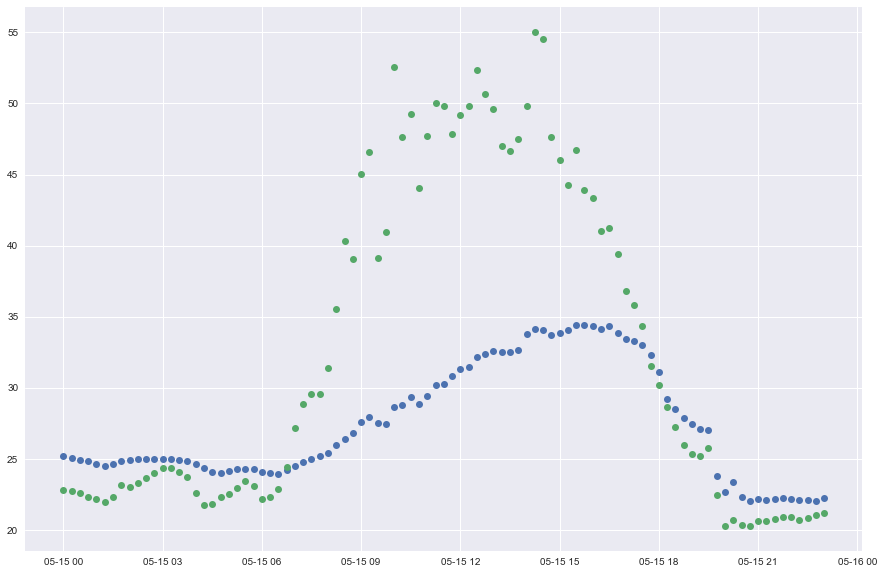

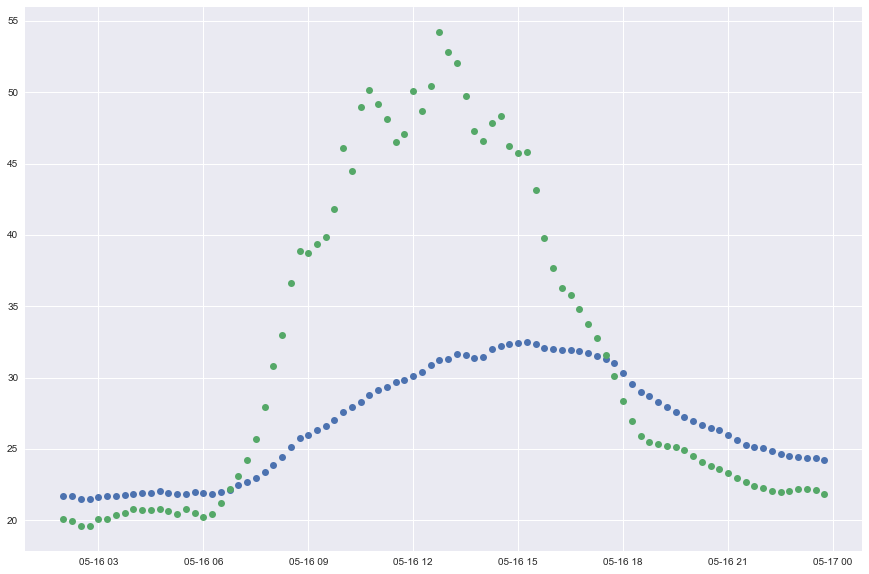

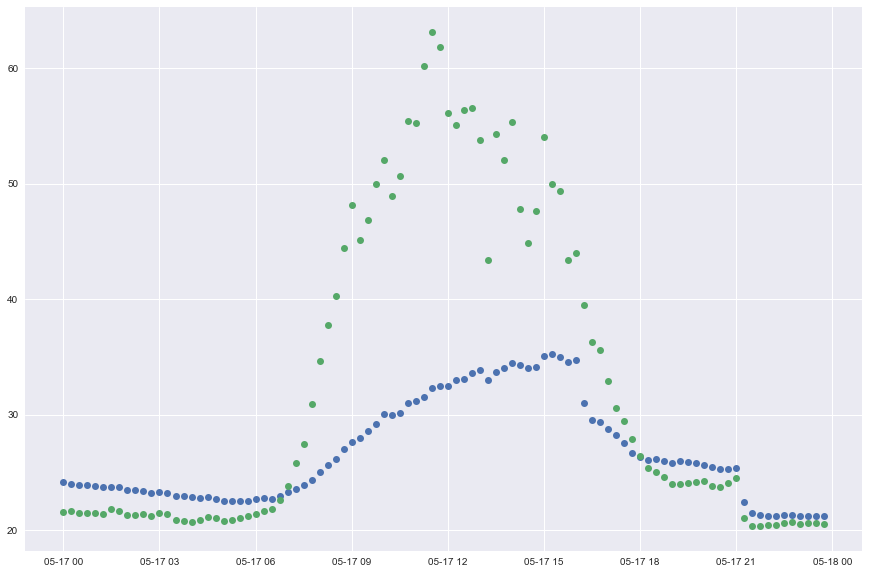

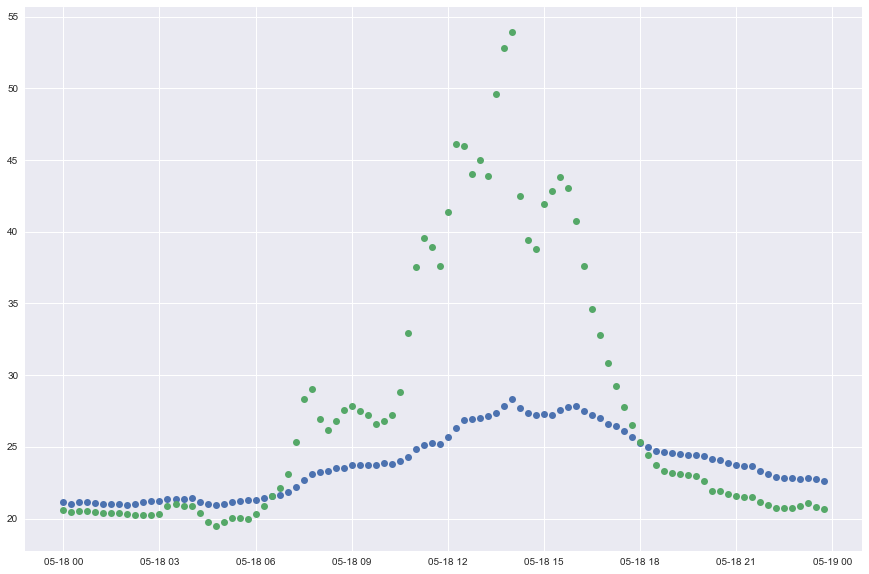

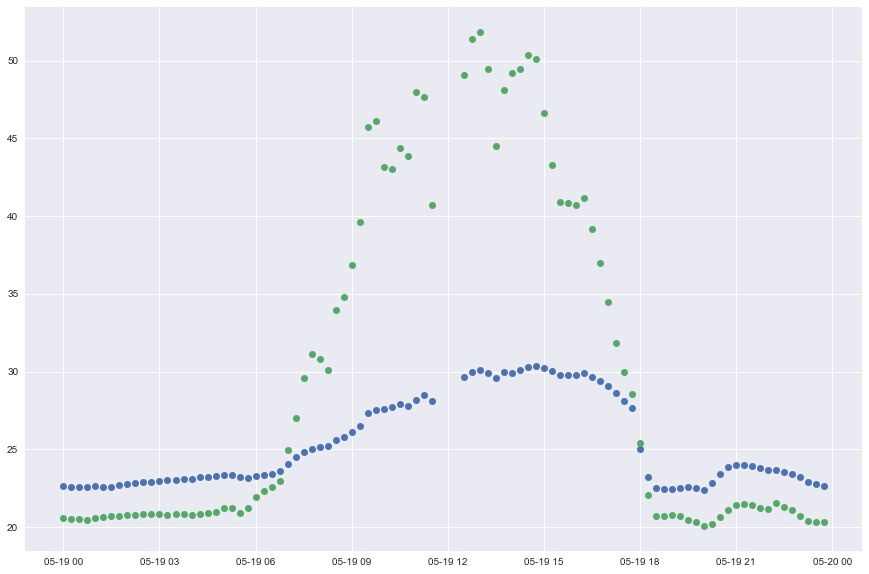

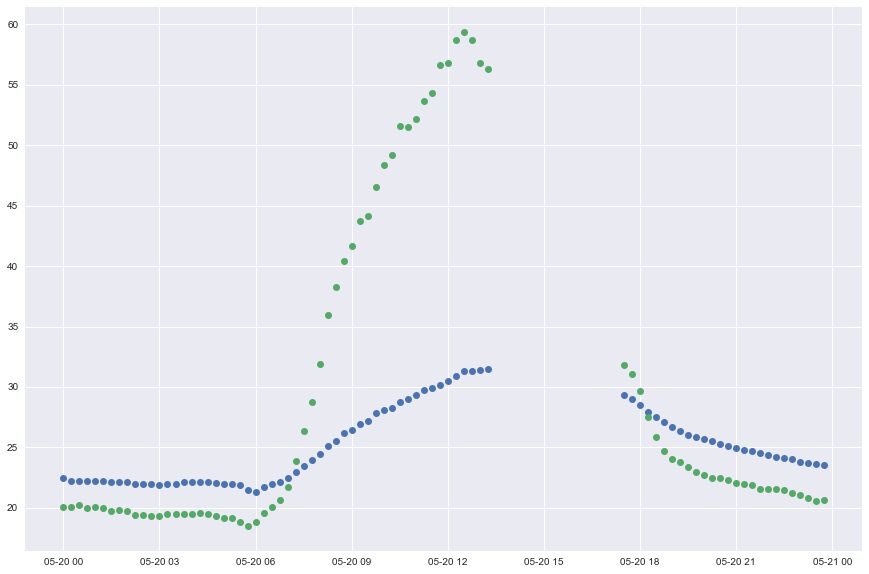

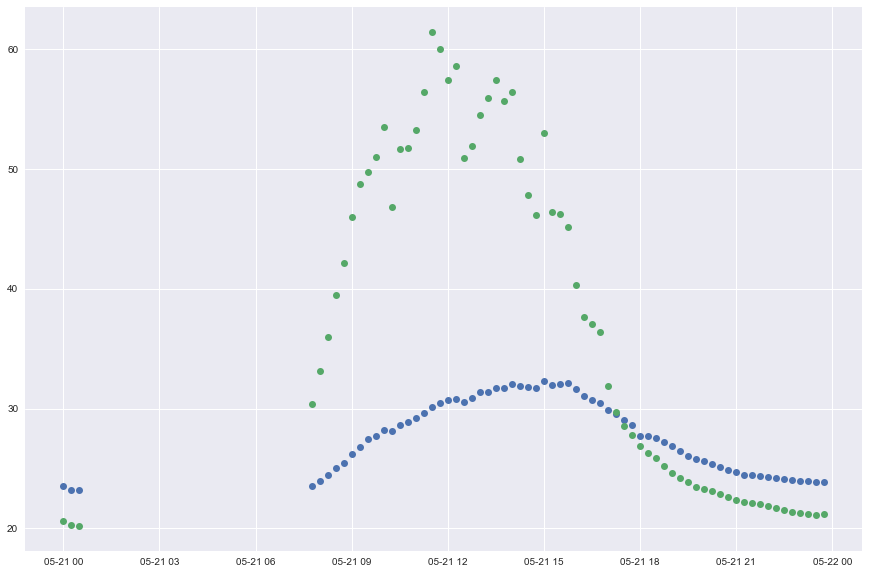

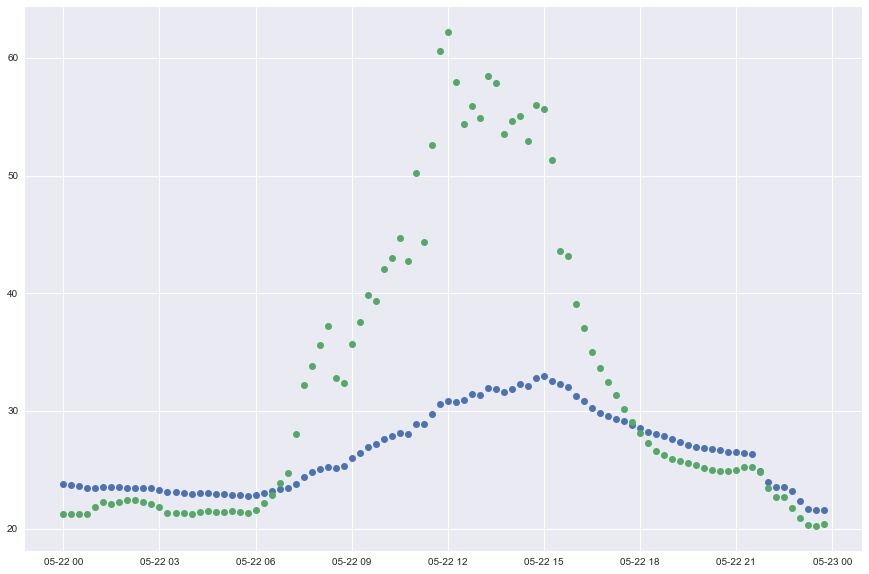

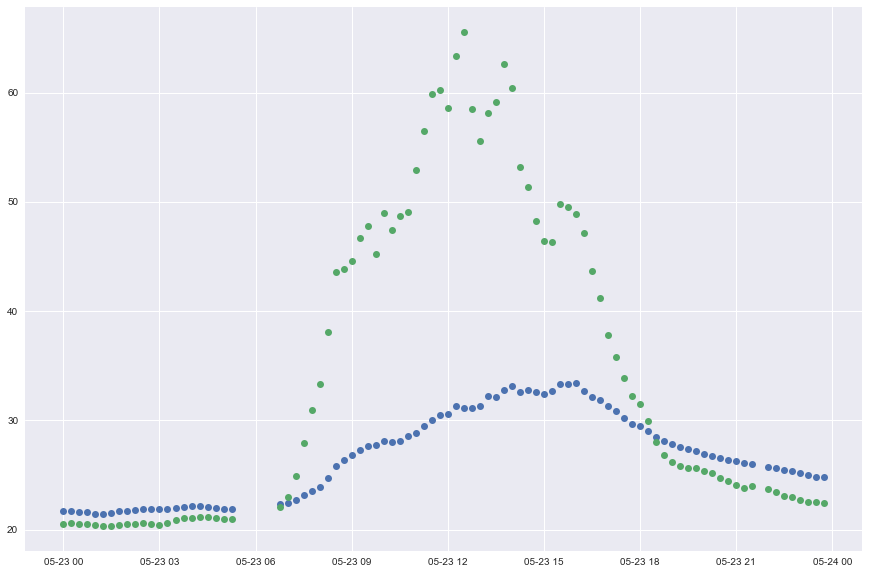

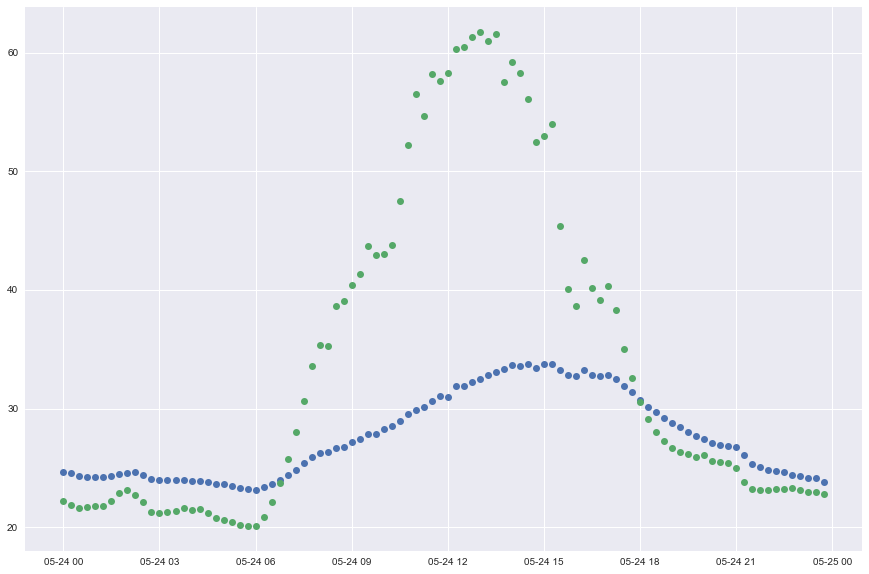

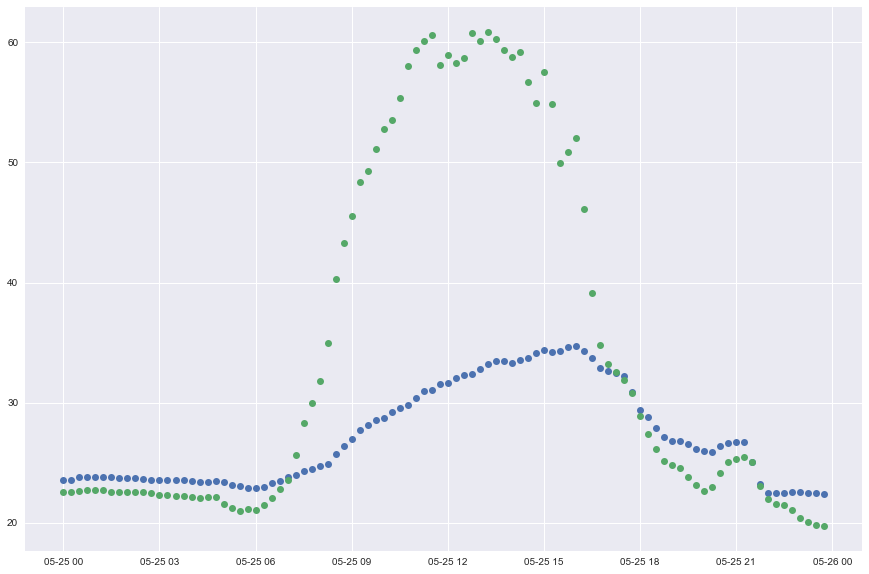

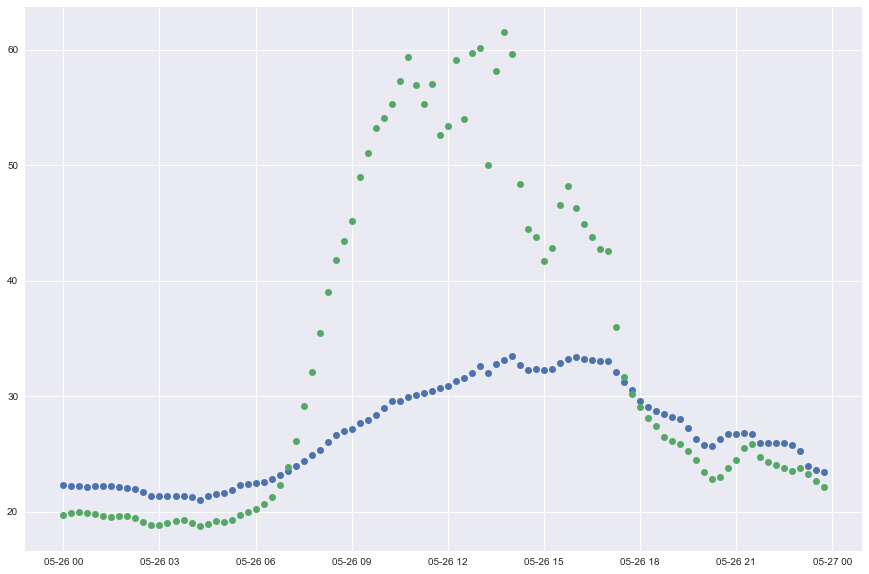

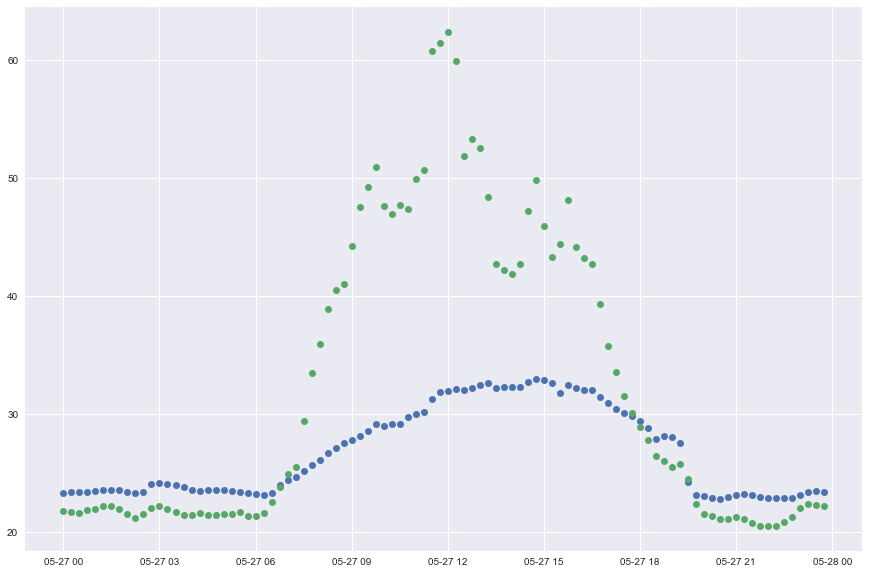

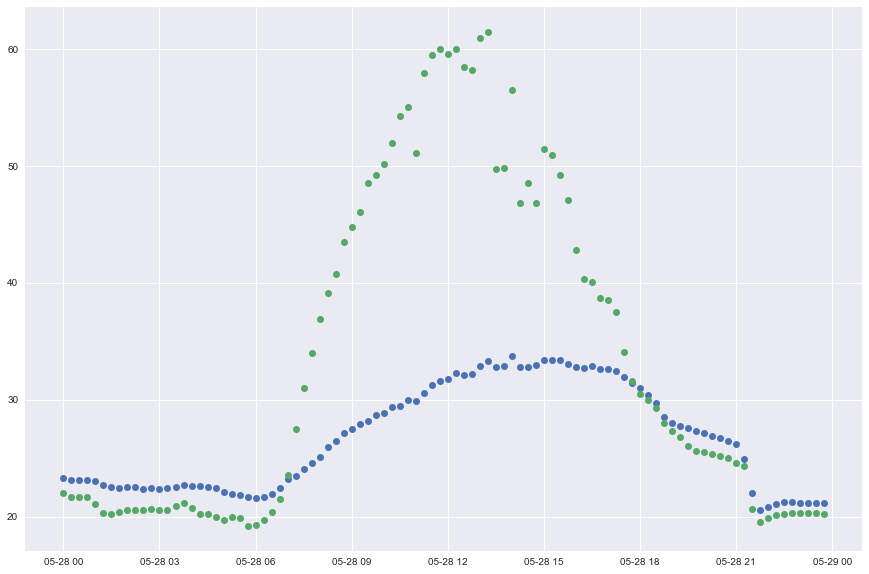

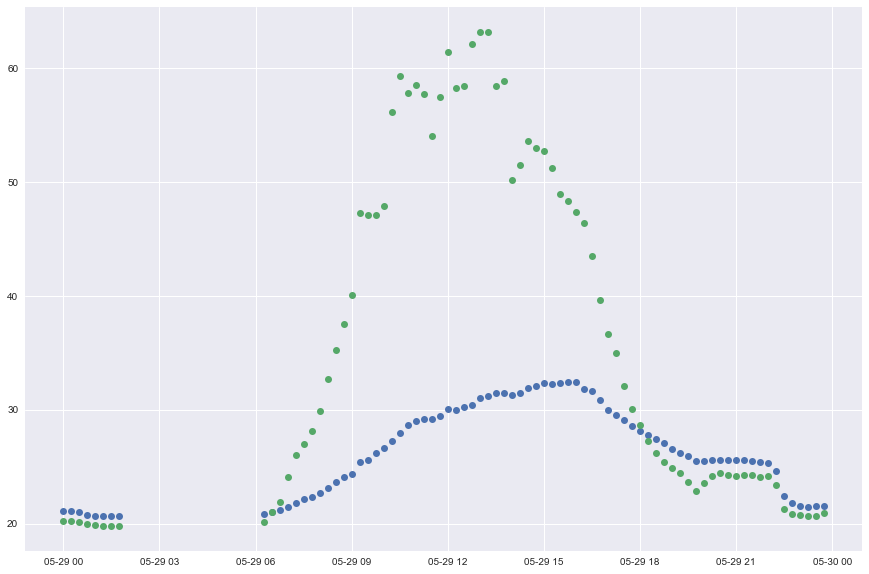

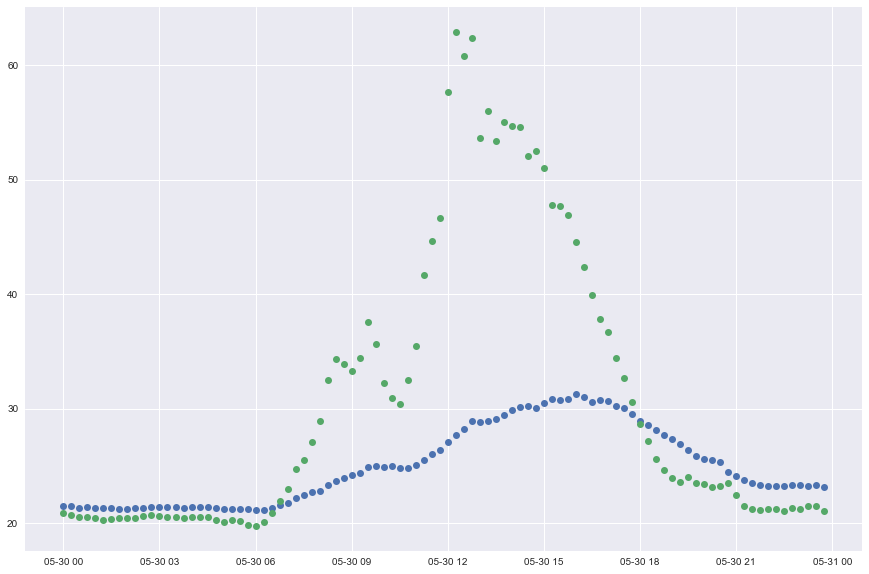

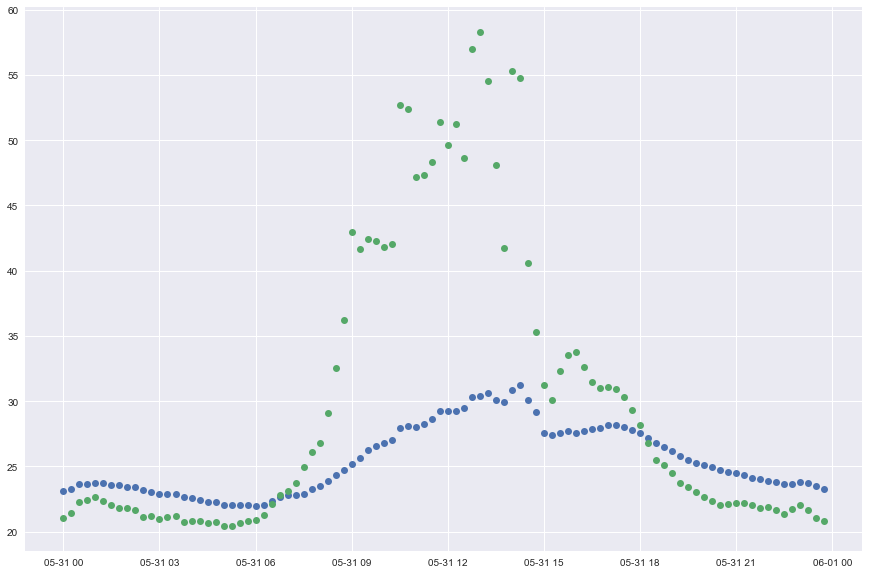

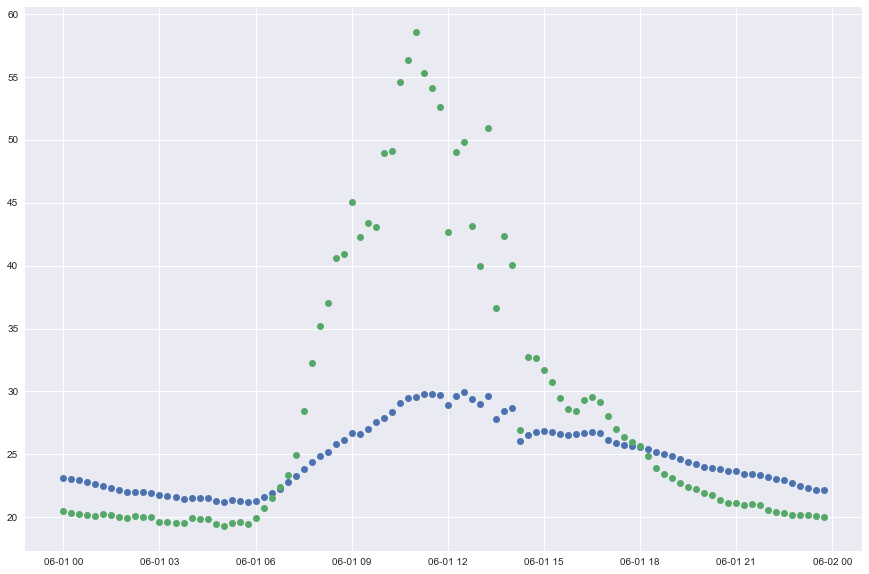

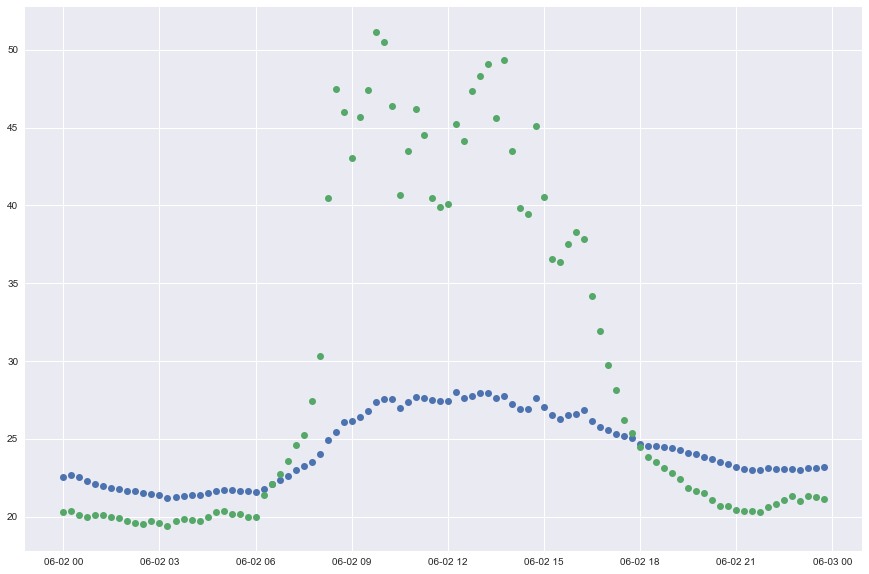

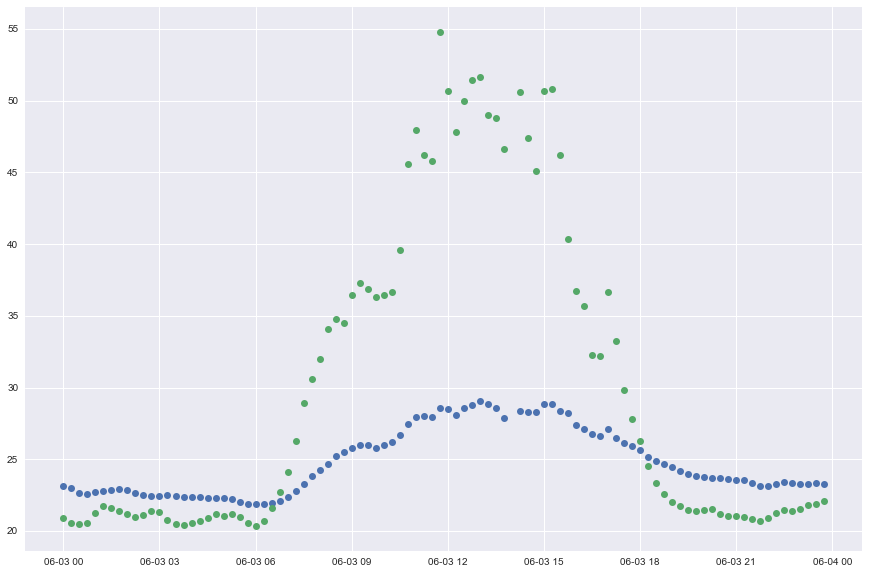

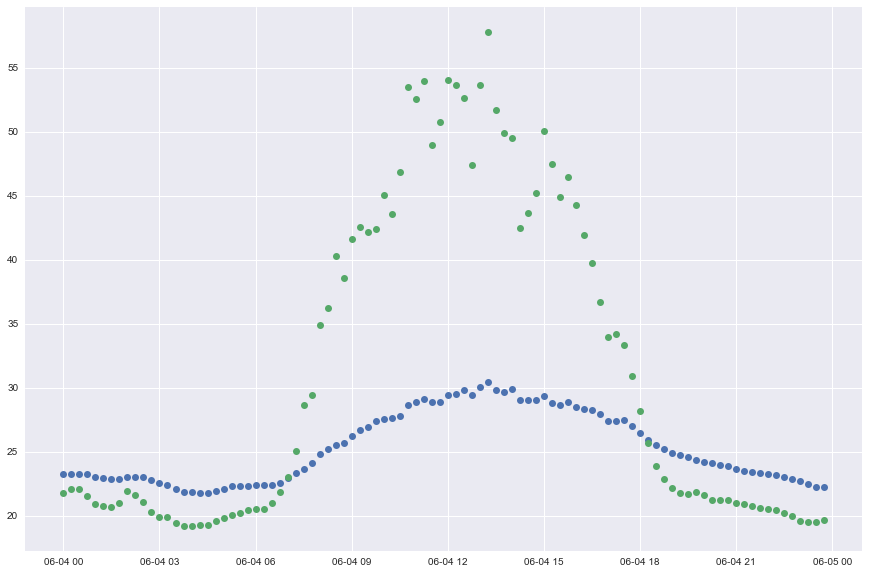

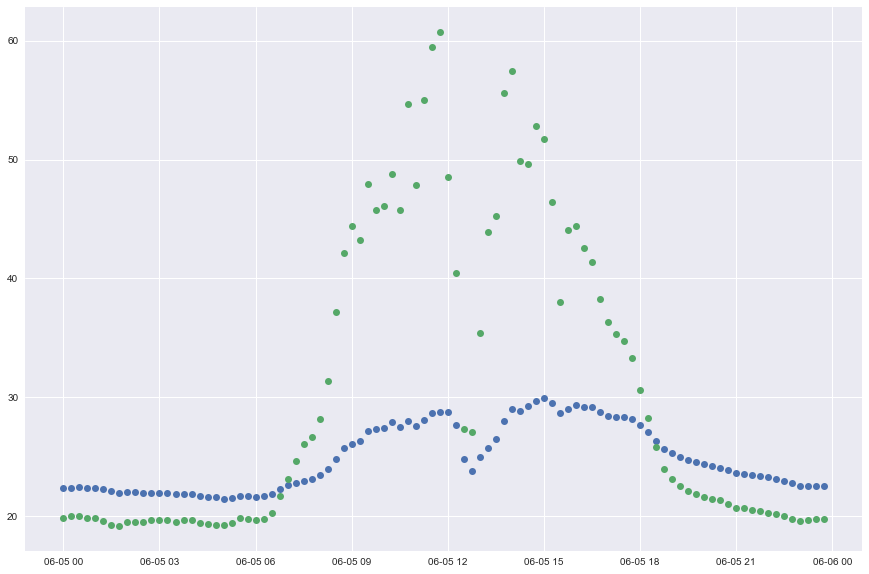

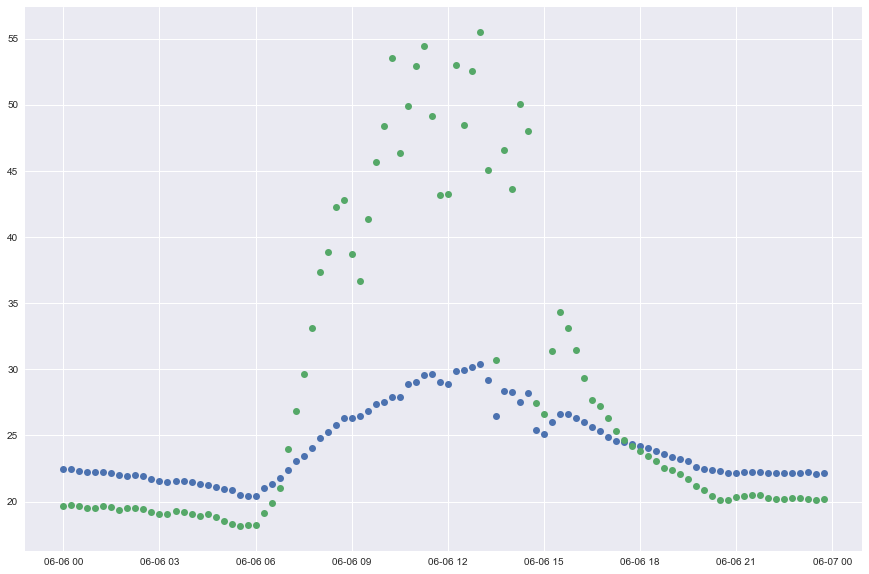

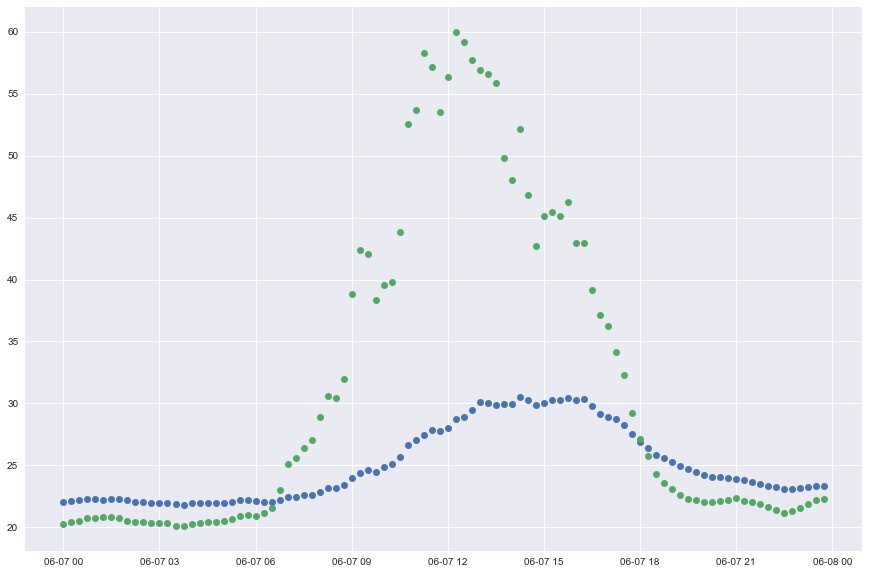

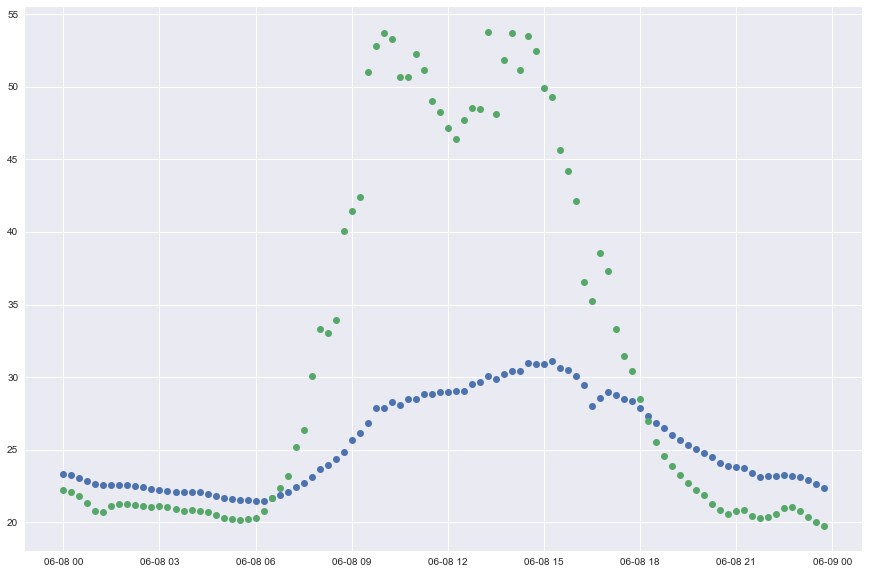

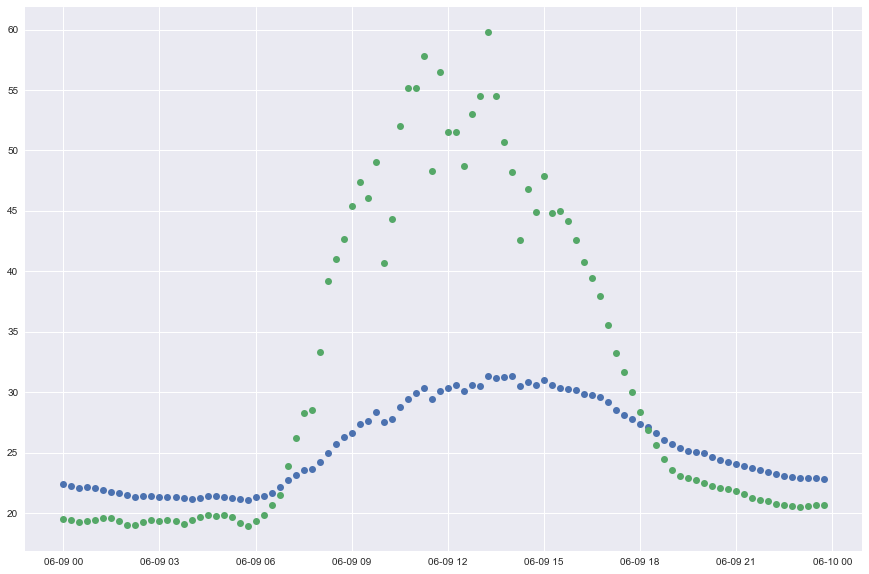

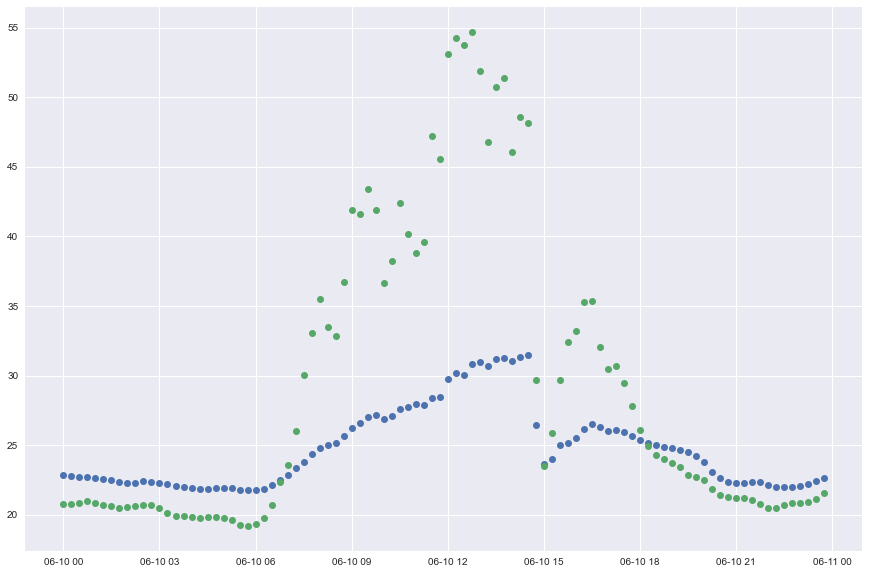

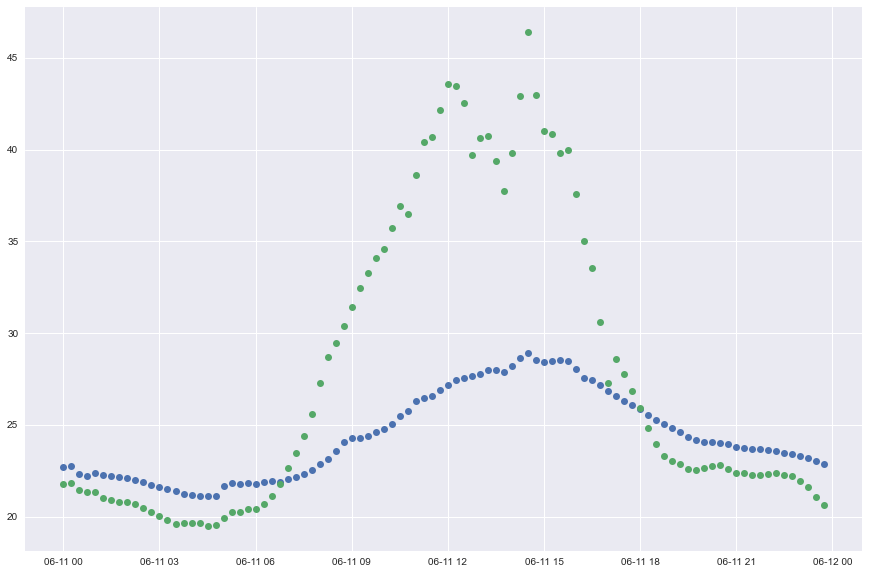

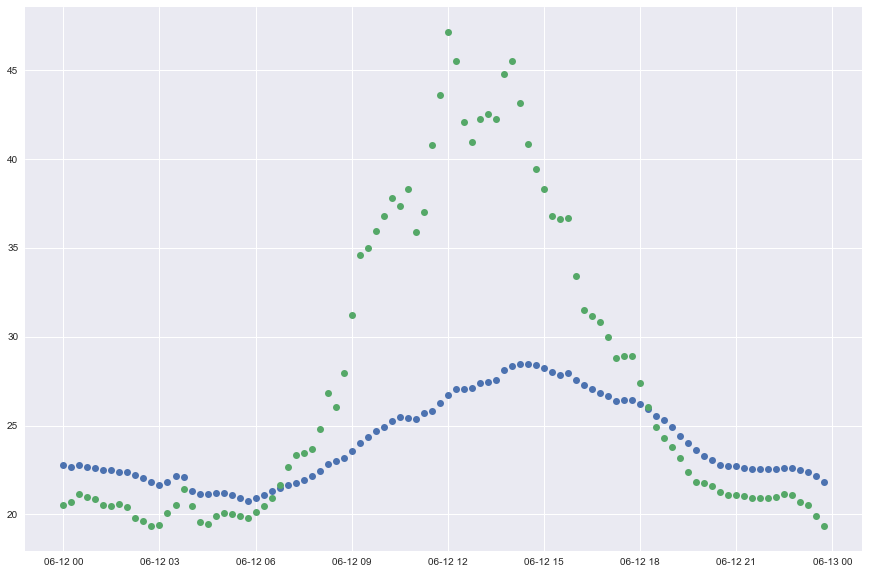

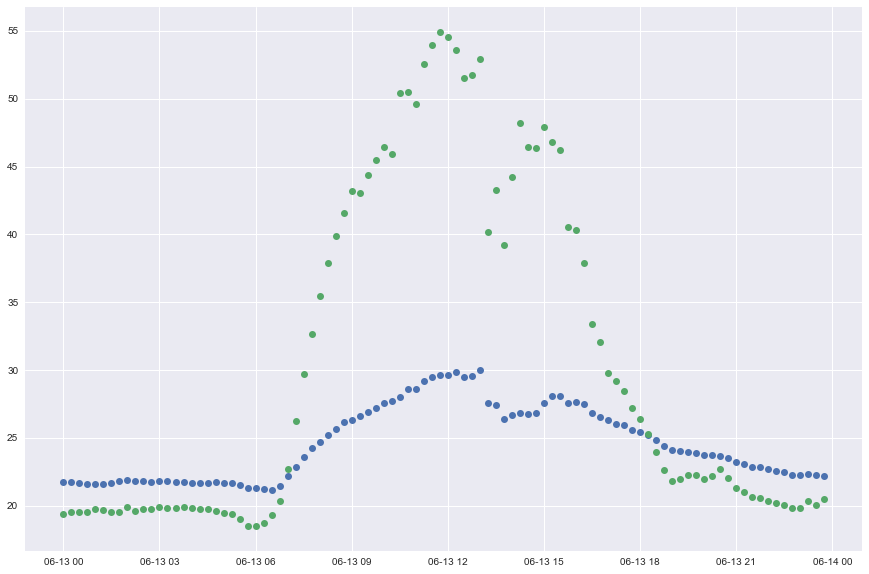

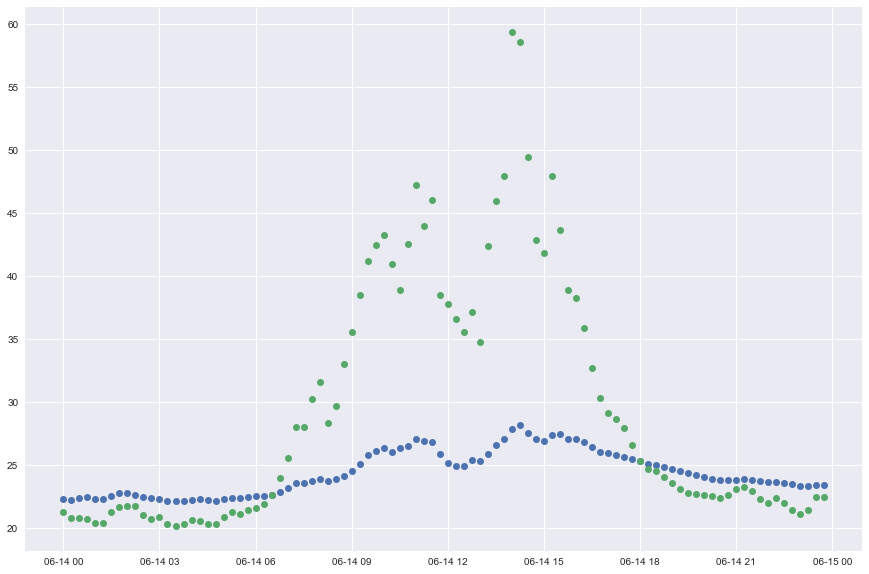

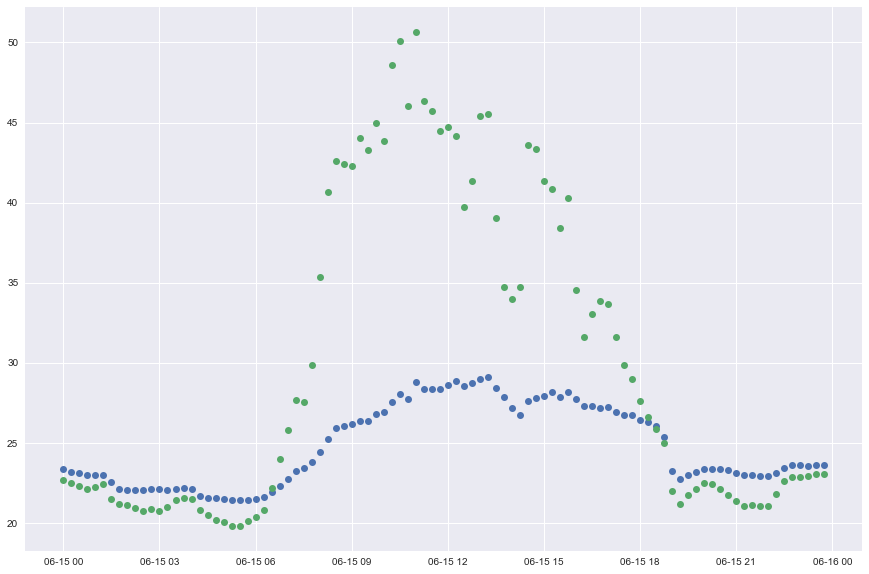

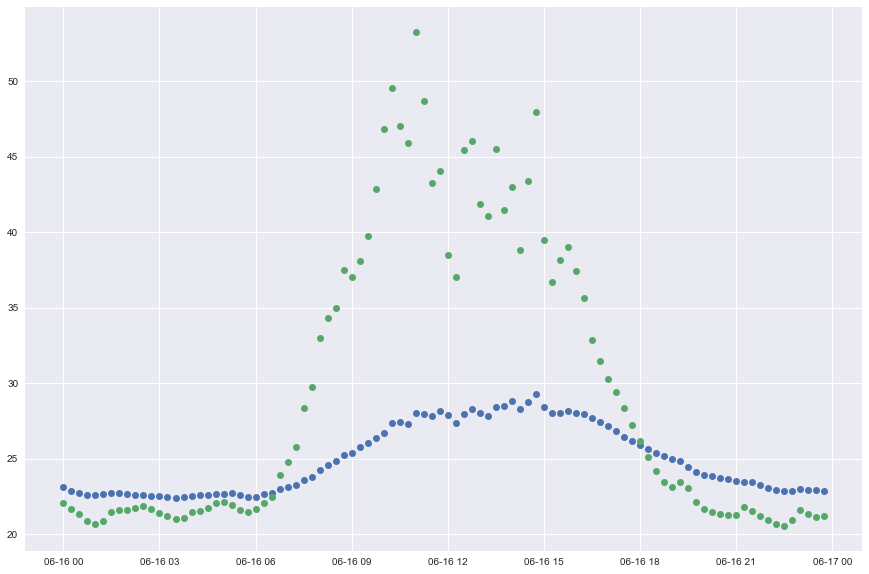

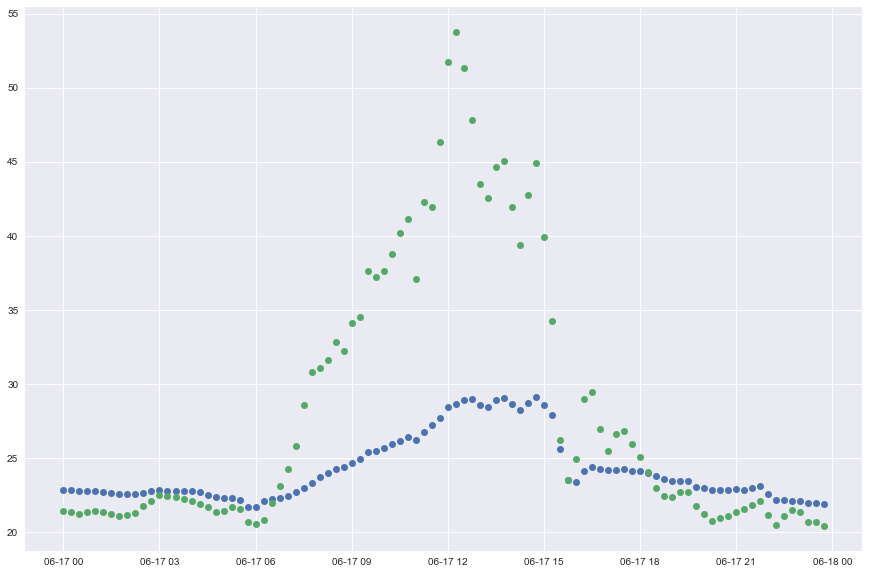

In [85]:
for _, gp in plant_1_weat.groupby(plant_1_weat['DATE_TIME'].dt.dayofyear):
    plt.figure(figsize=(15, 10))
    plt.plot_date(gp['DATE_TIME'], gp['AMBIENT_TEMPERATURE'])
    plt.plot_date(gp['DATE_TIME'], gp['MODULE_TEMPERATURE'])
    plt.show()

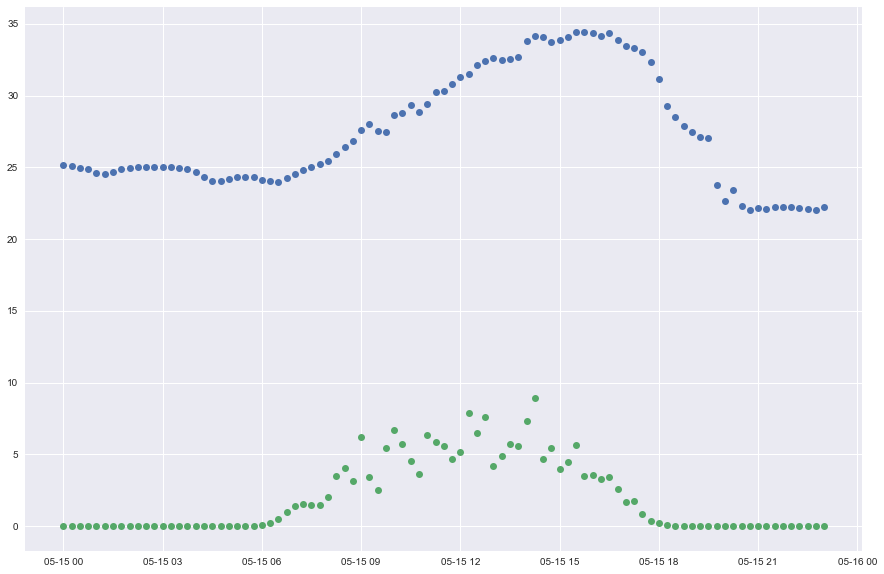

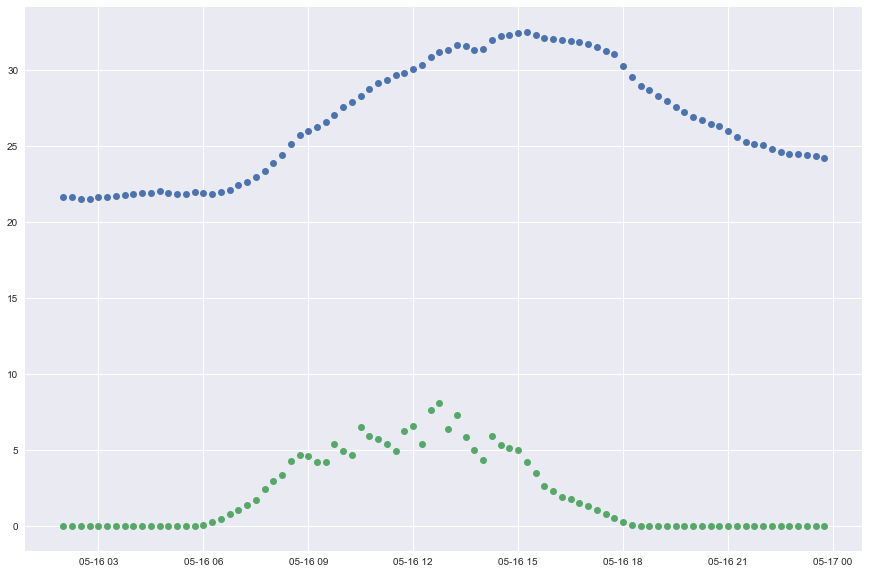

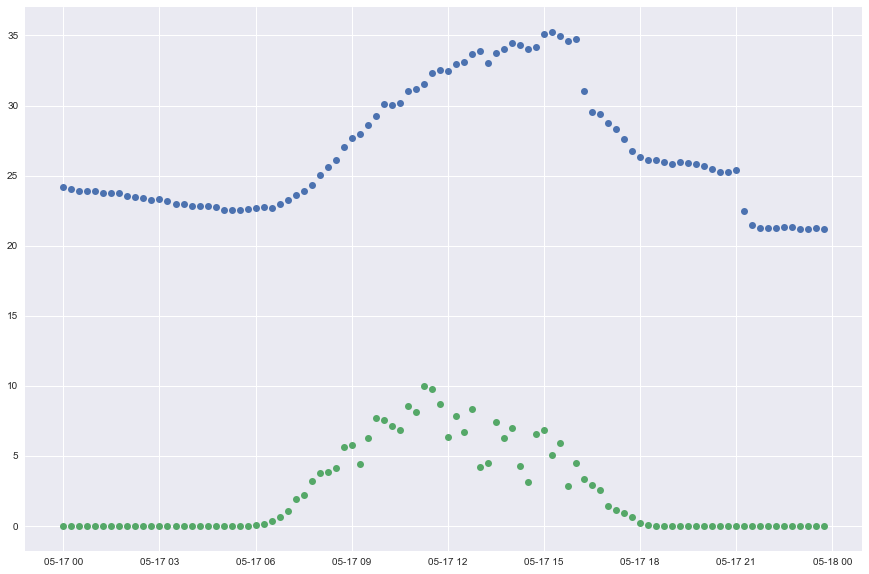

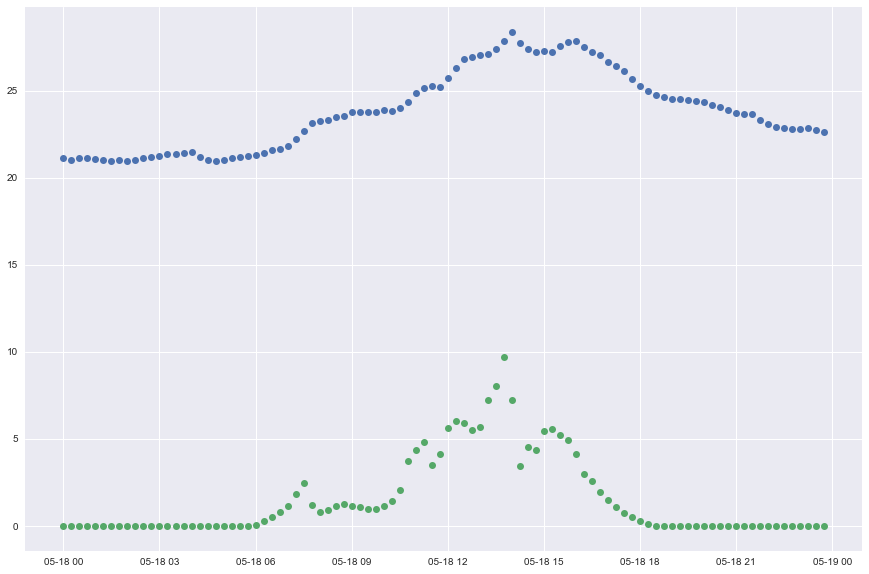

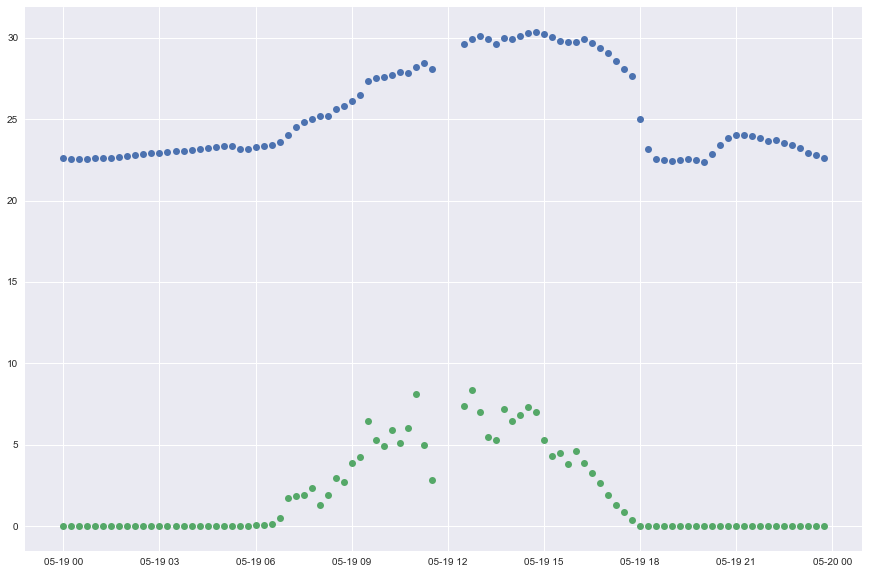

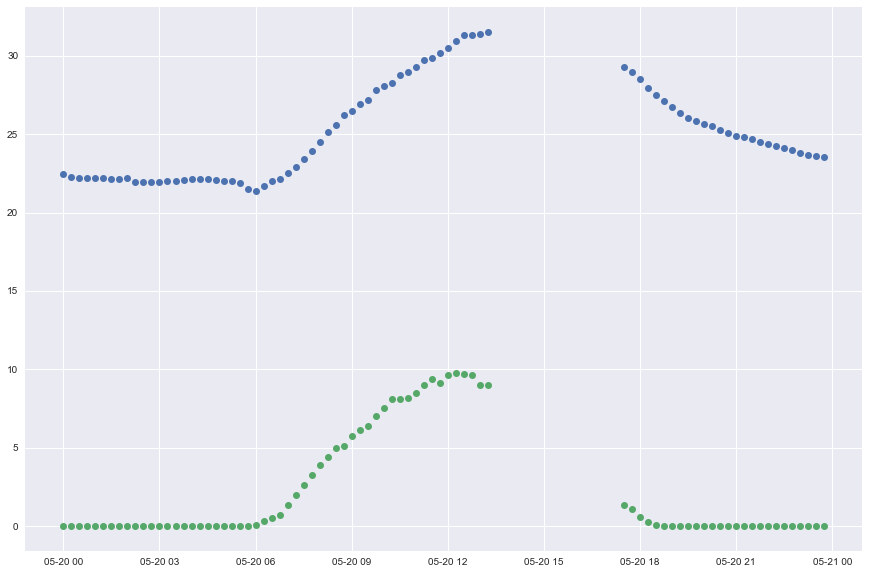

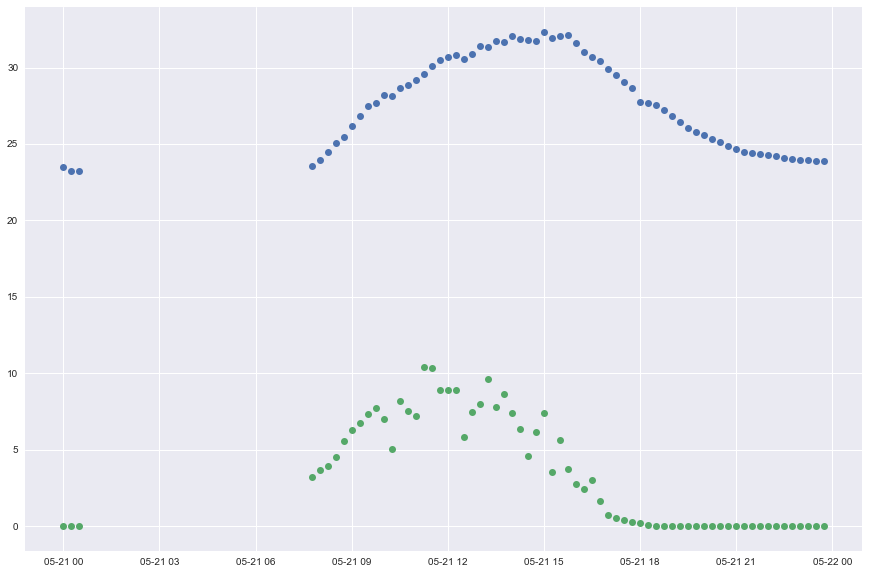

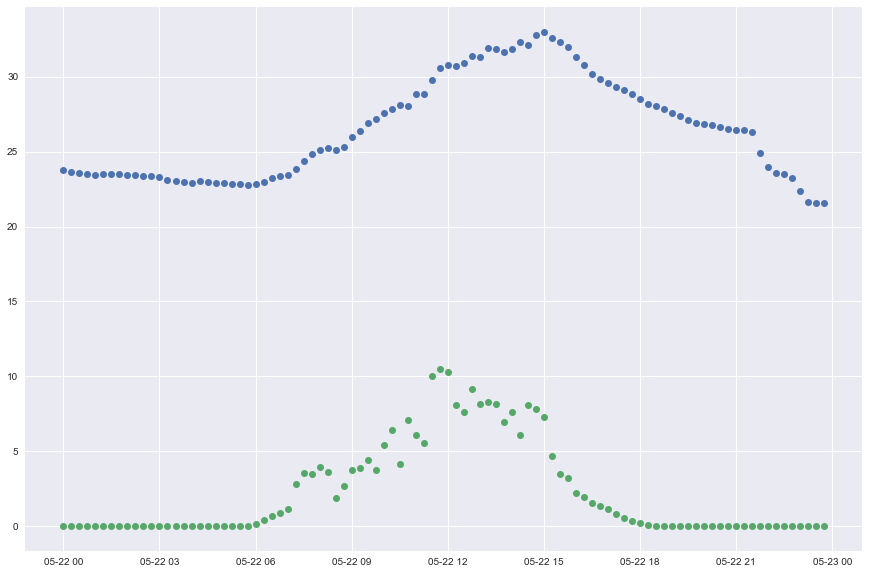

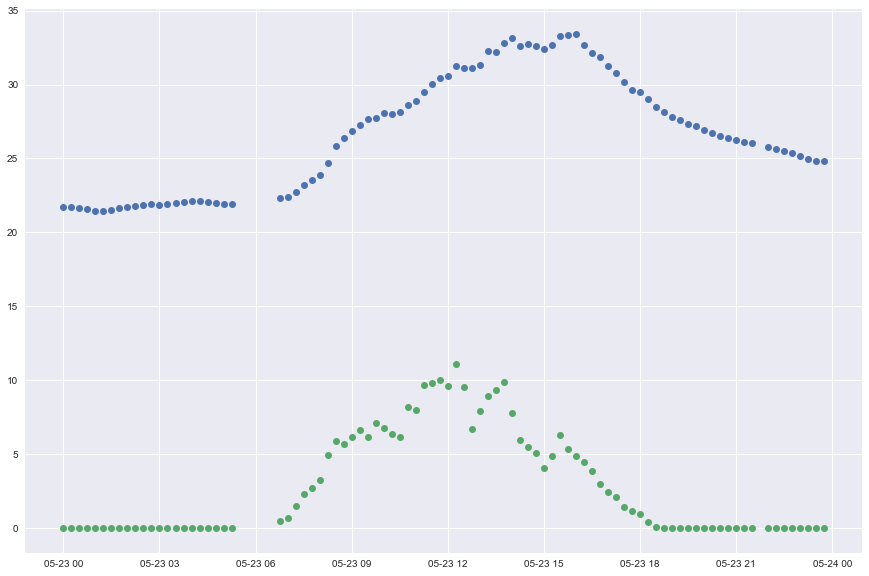

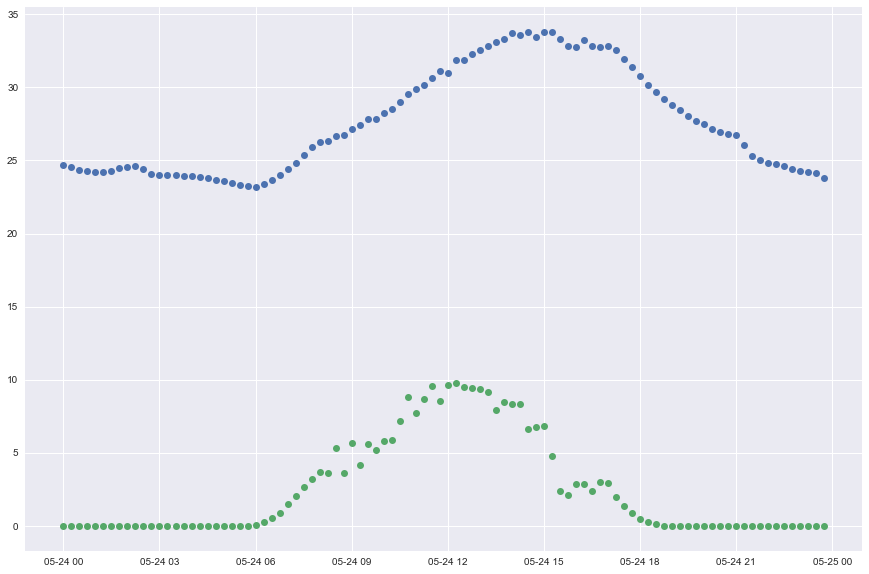

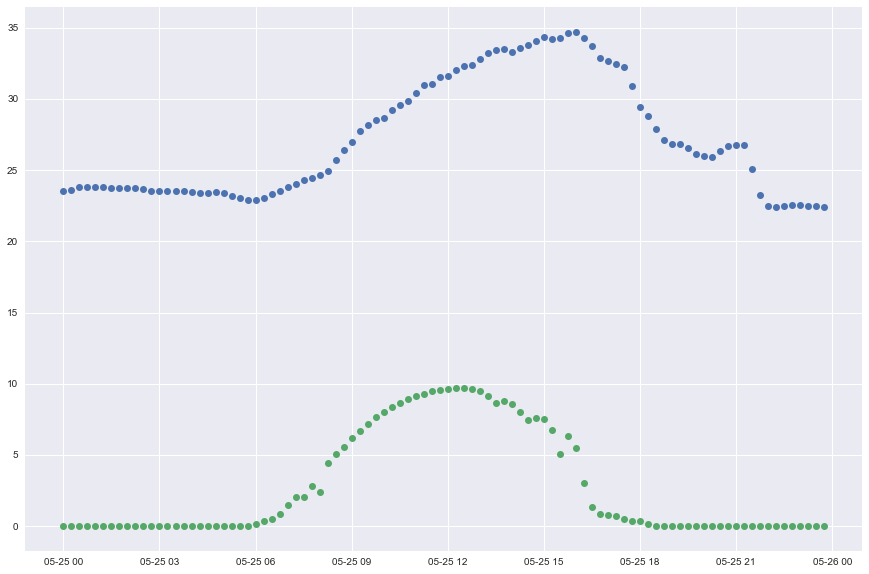

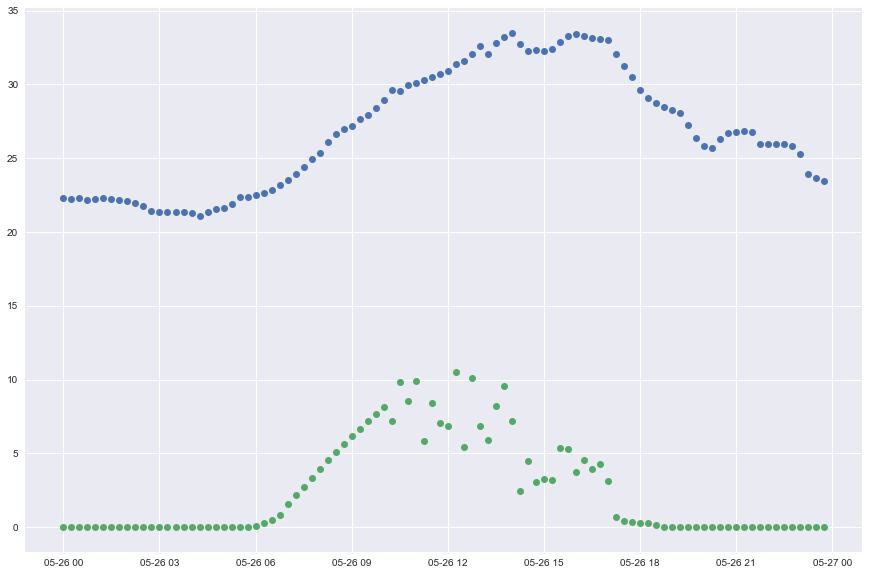

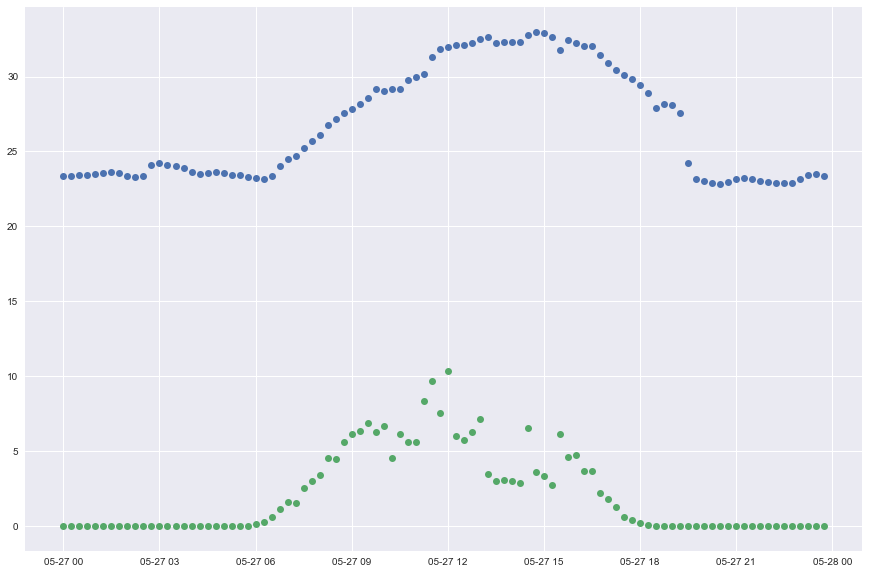

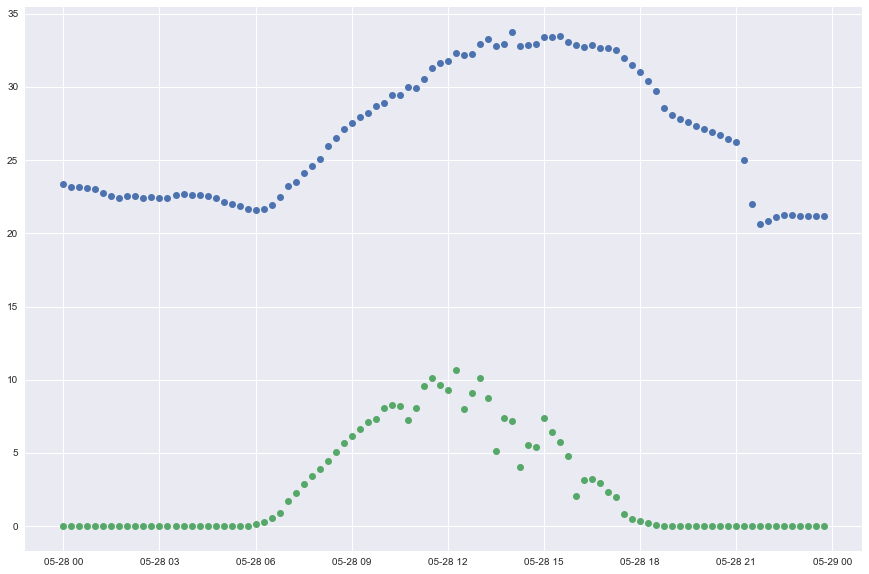

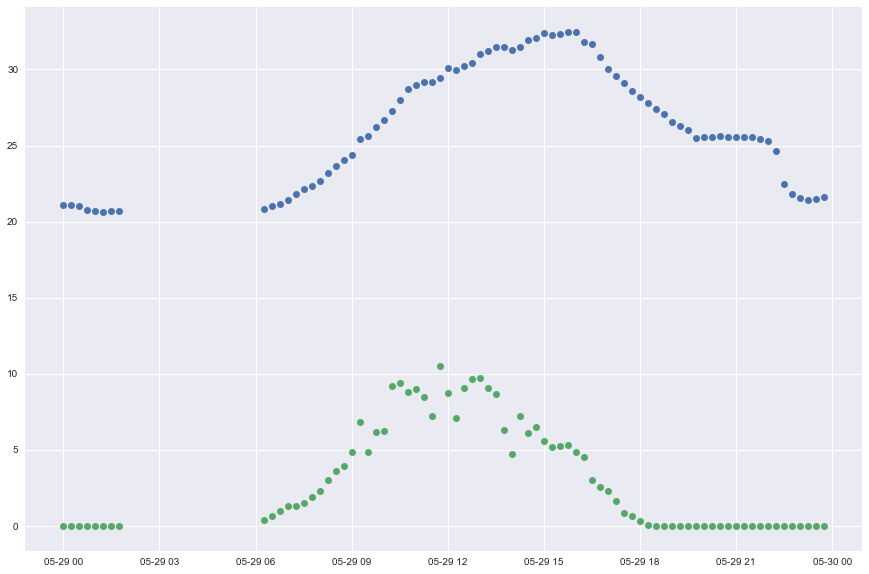

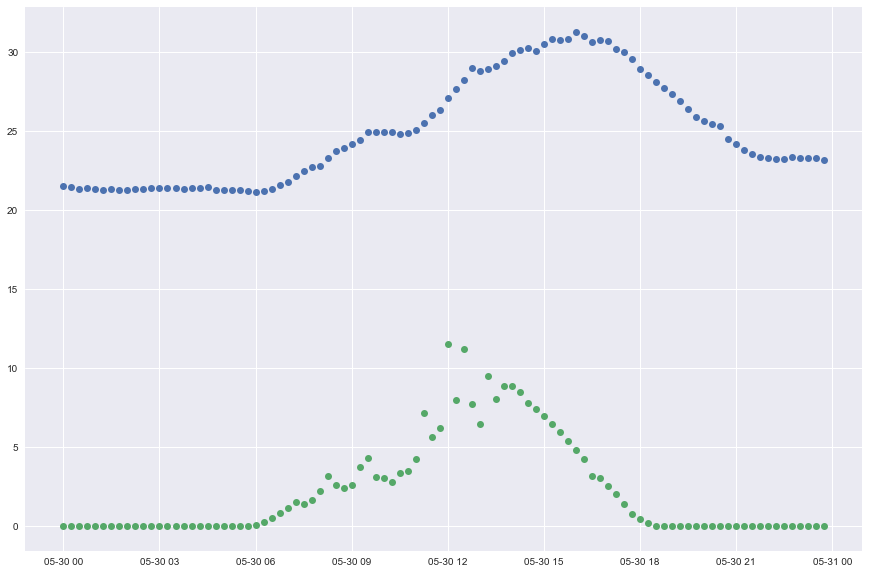

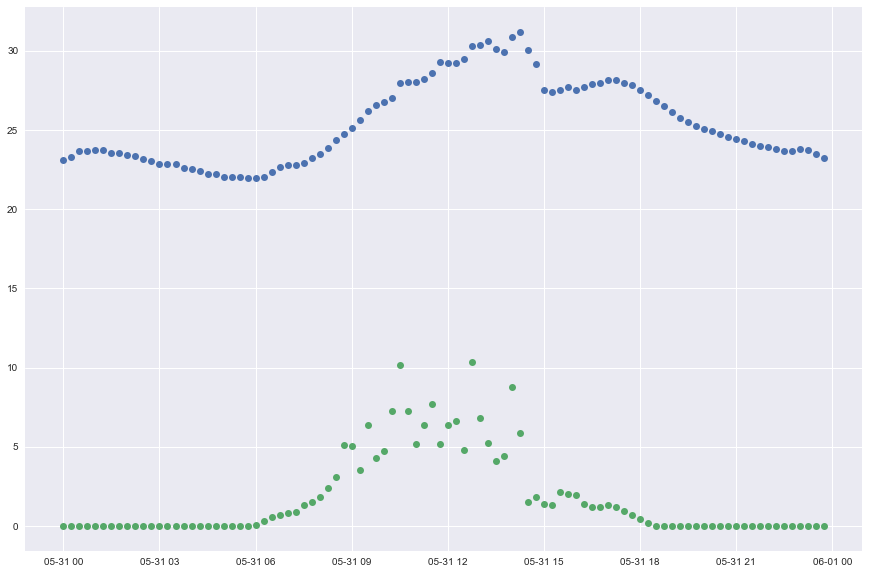

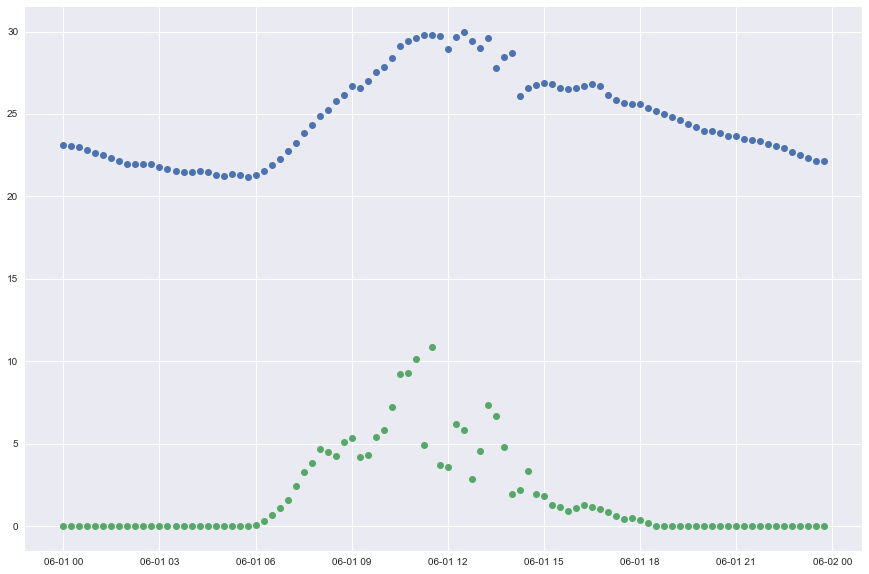

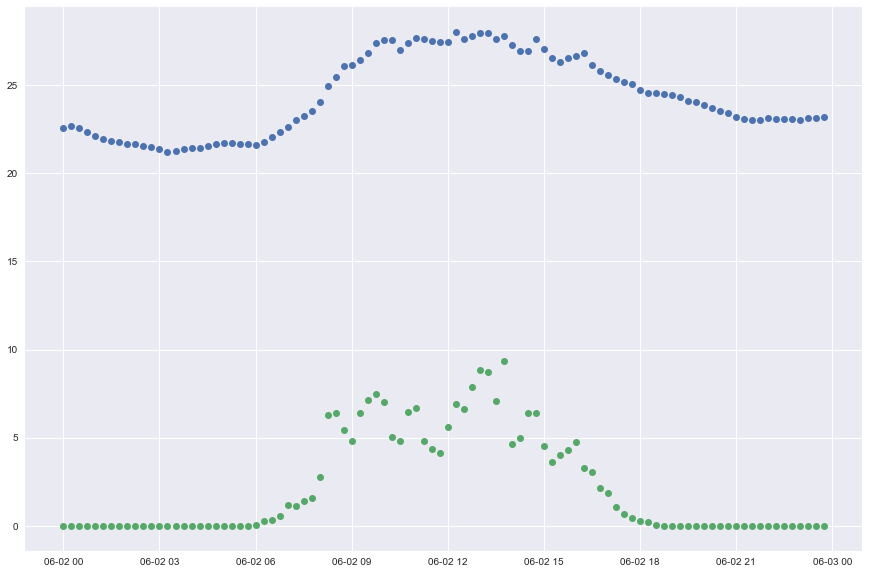

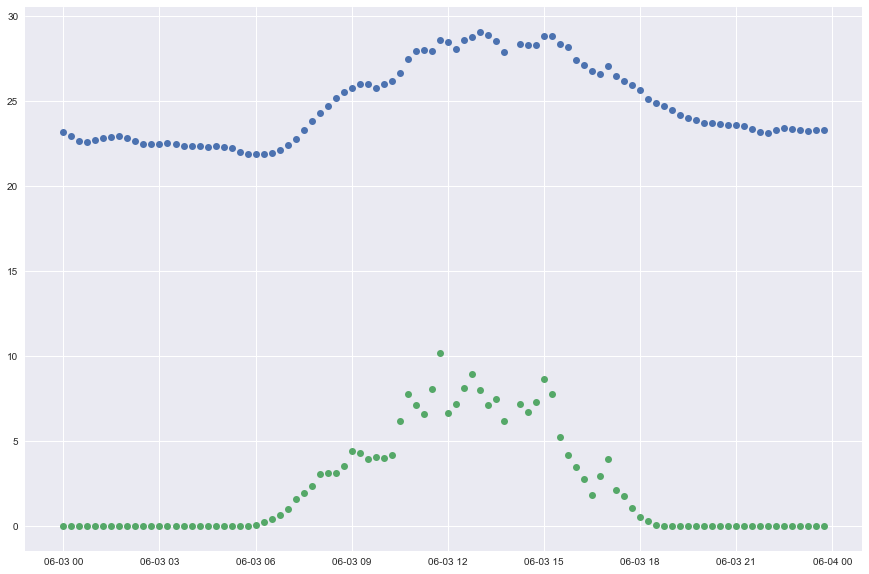

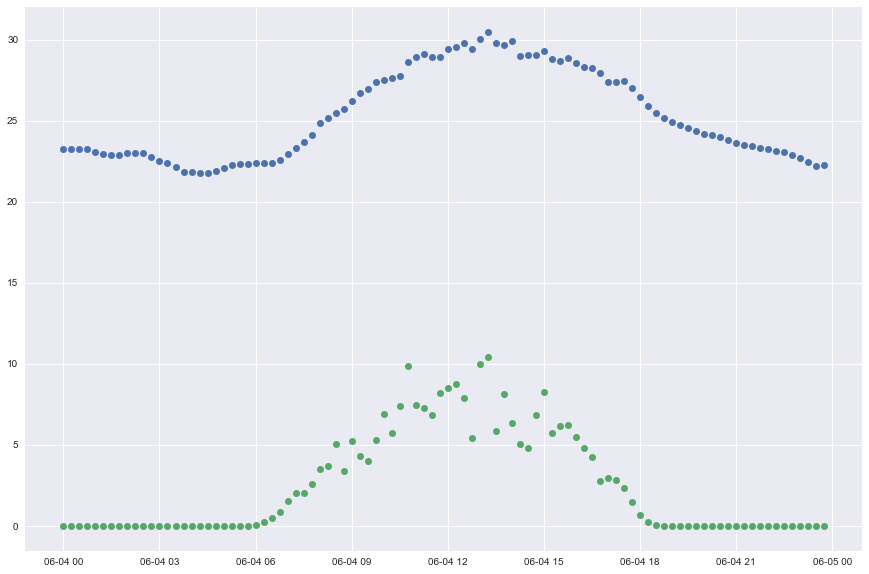

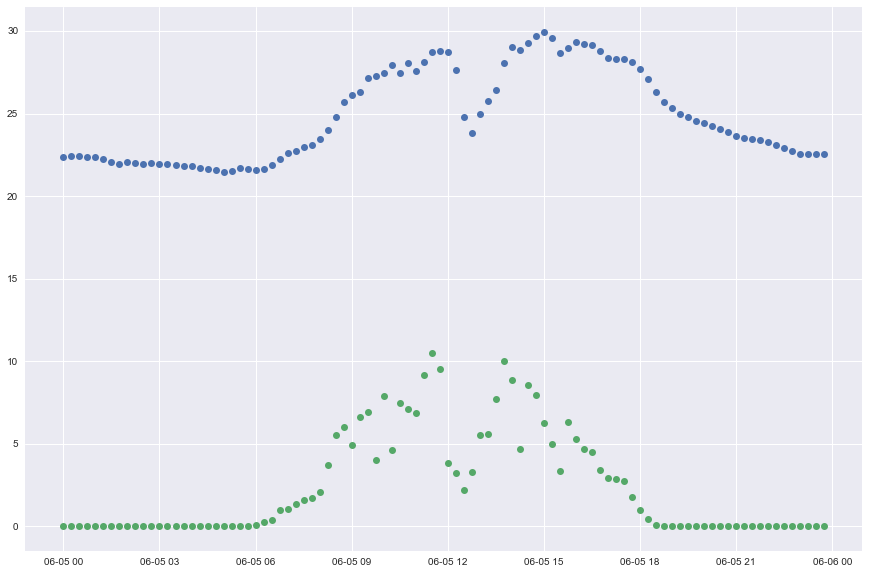

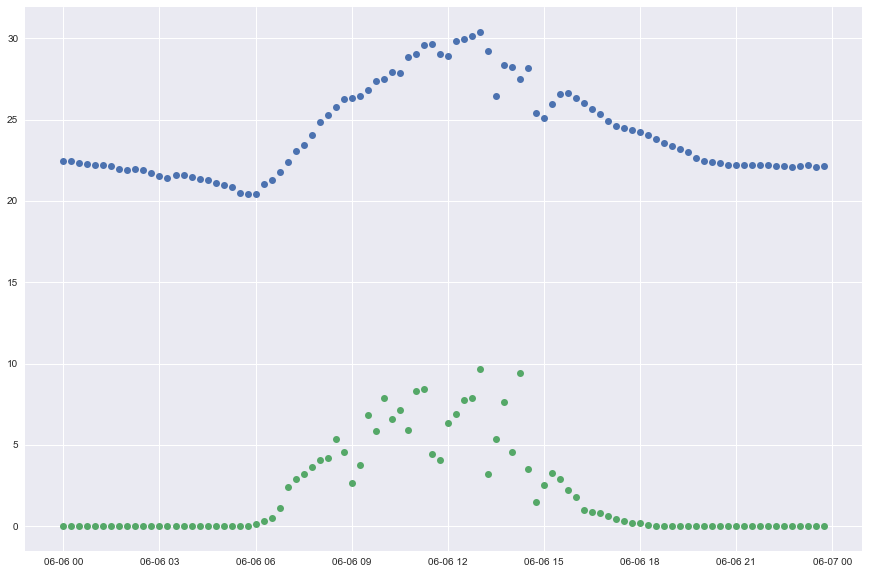

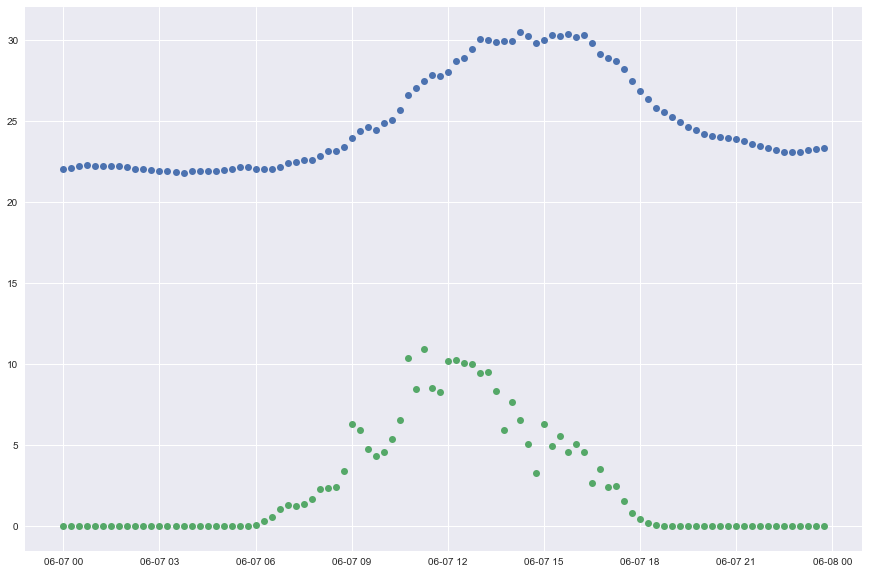

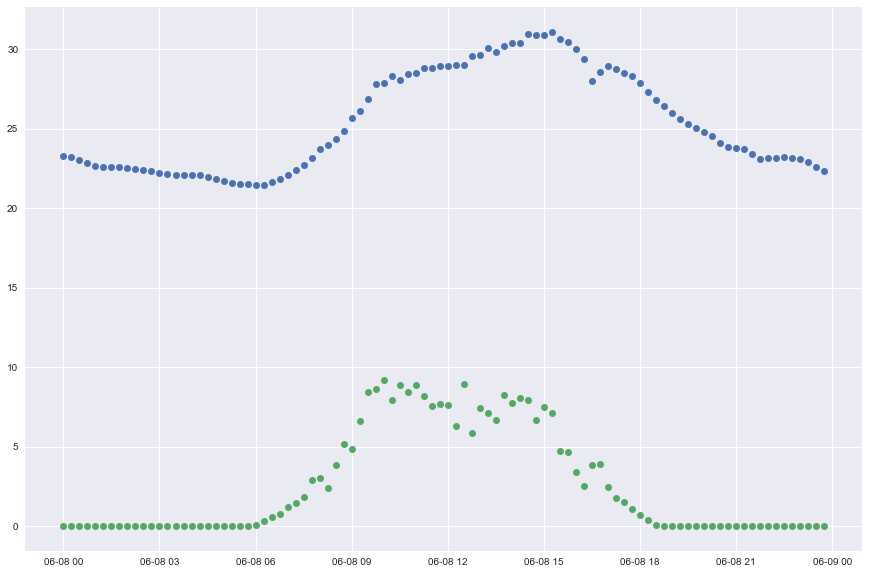

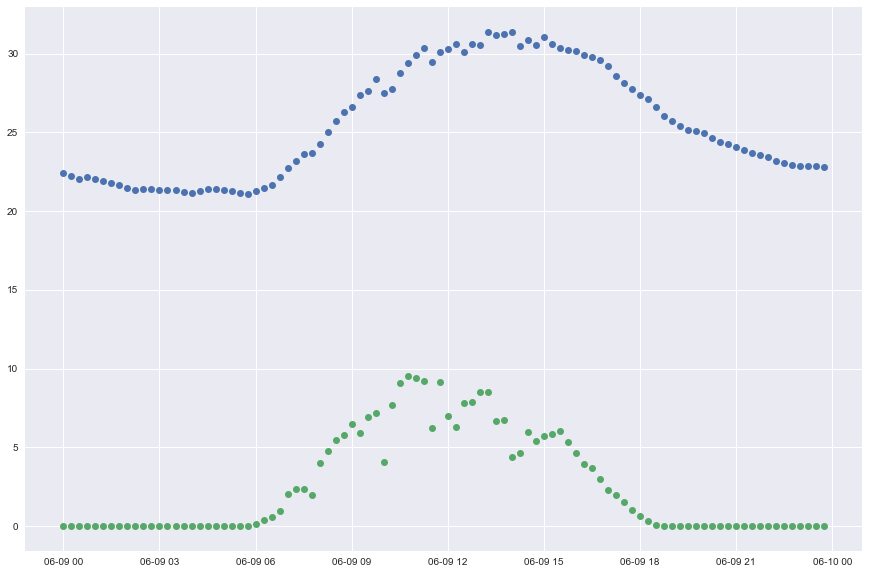

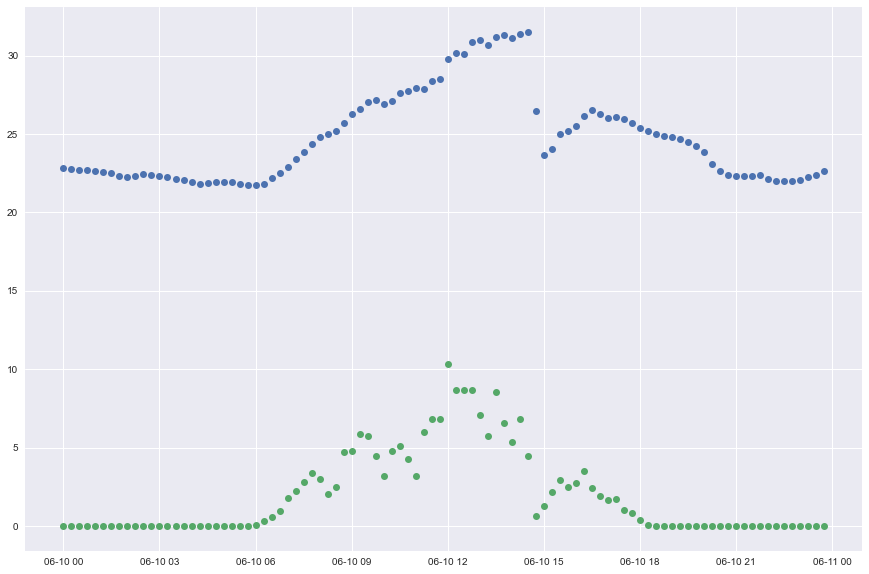

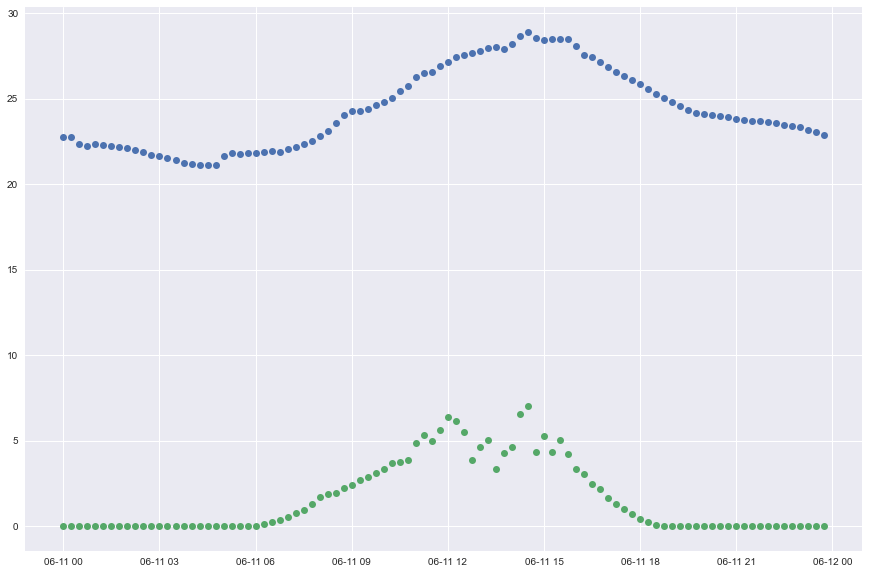

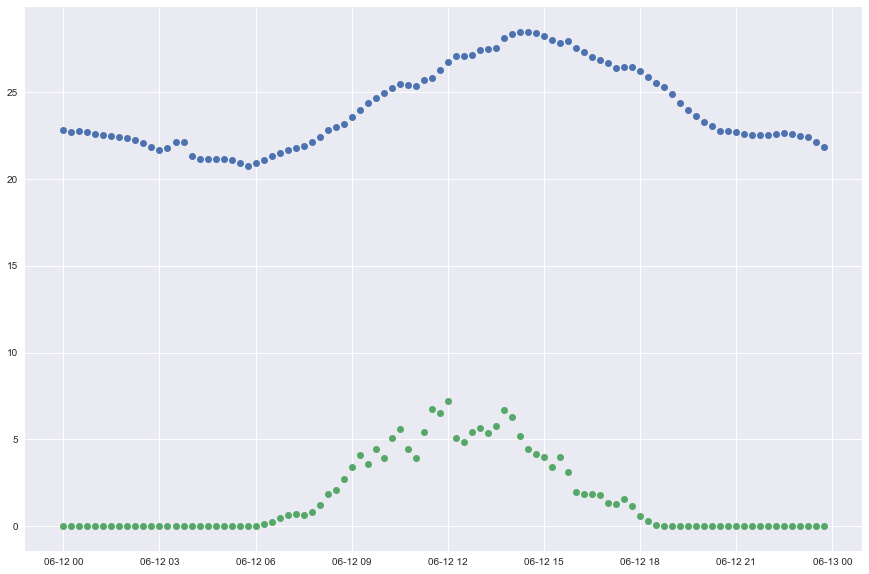

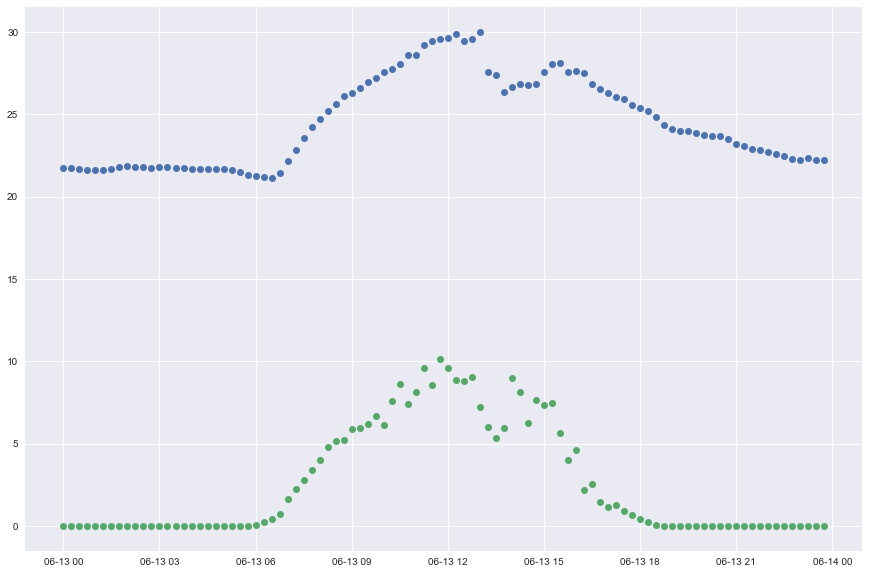

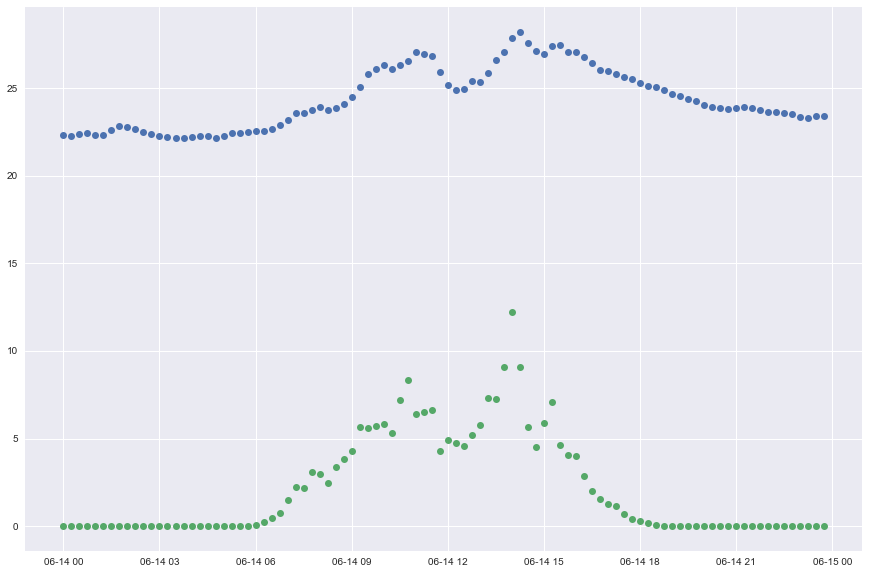

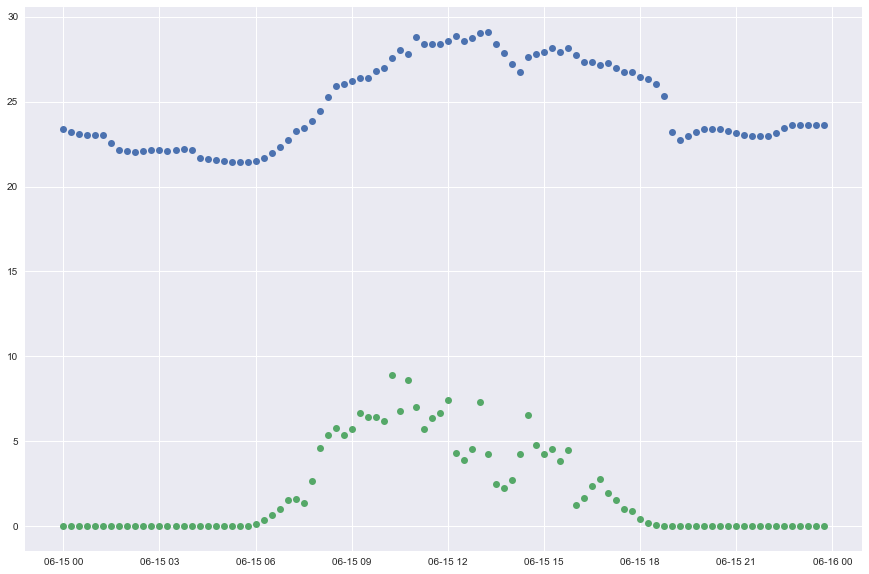

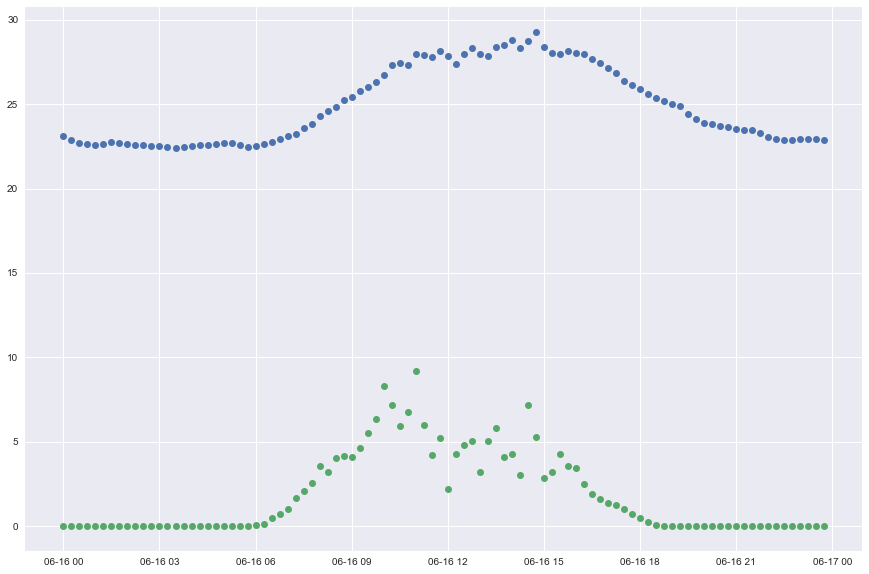

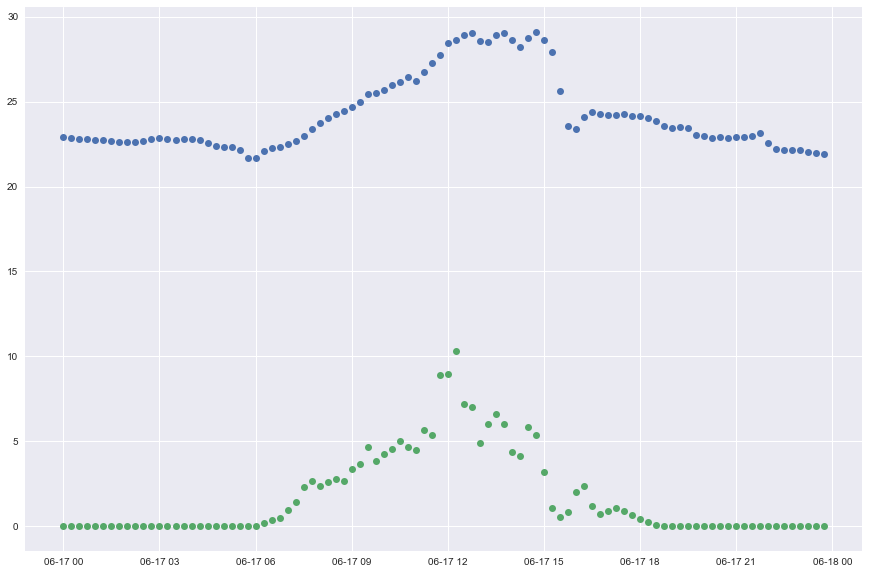

In [92]:
for _, gp in plant_1_weat.groupby(plant_1_weat['DATE_TIME'].dt.dayofyear):
    plt.figure(figsize=(15, 10))
    plt.plot_date(gp['DATE_TIME'], gp['AMBIENT_TEMPERATURE'])
    # Adjust IRRADIATION to make it visally clearer 
    plt.plot_date(gp['DATE_TIME'], (10 * gp['IRRADIATION']))
    plt.show()

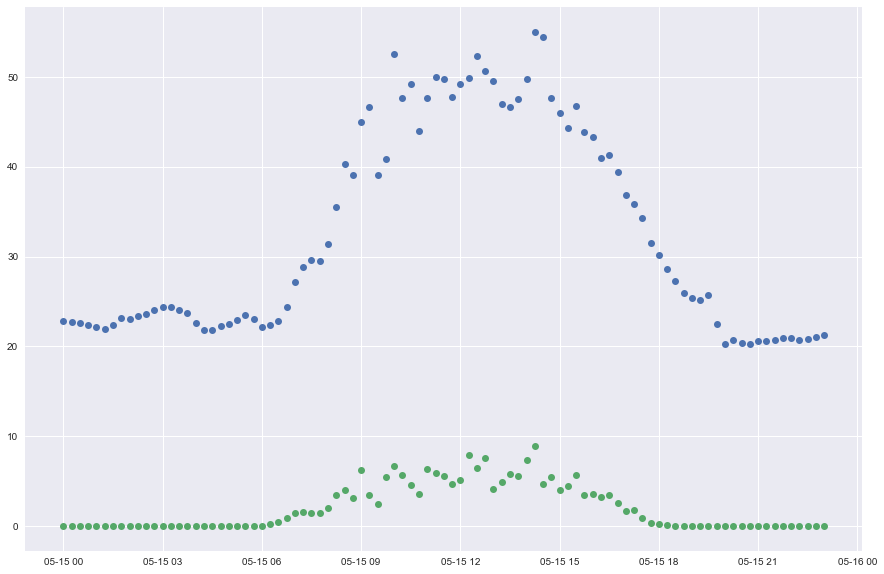

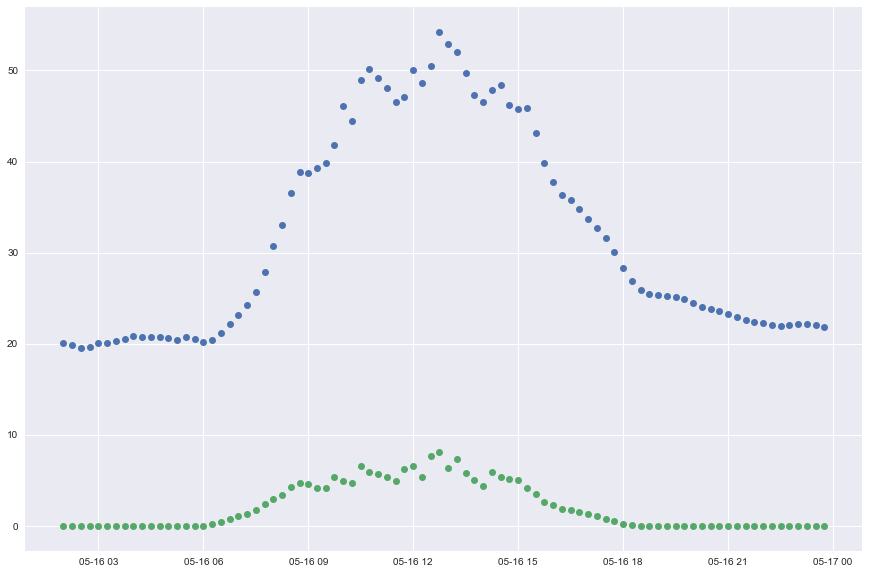

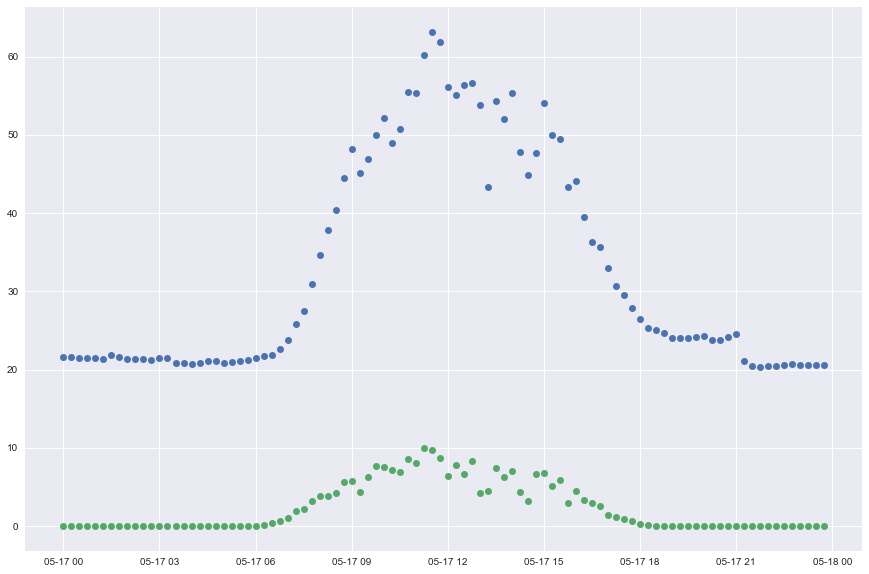

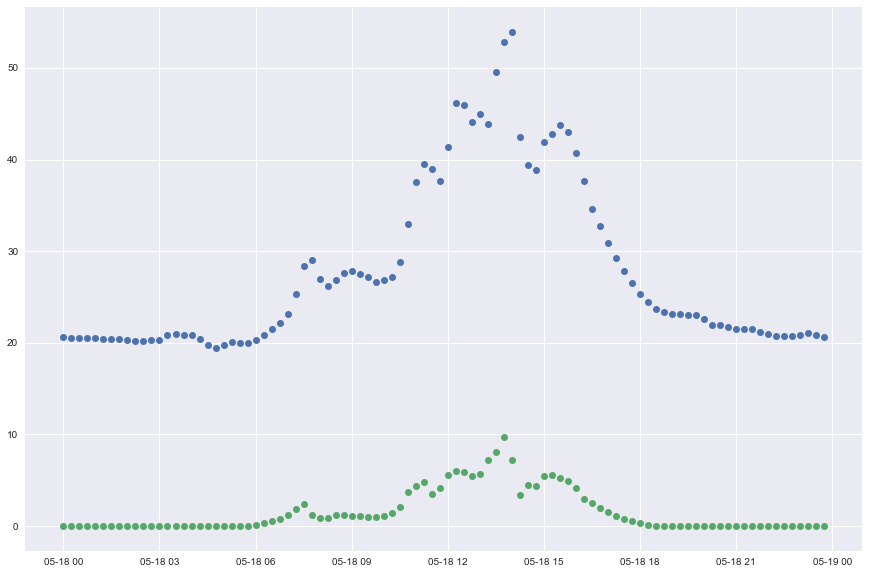

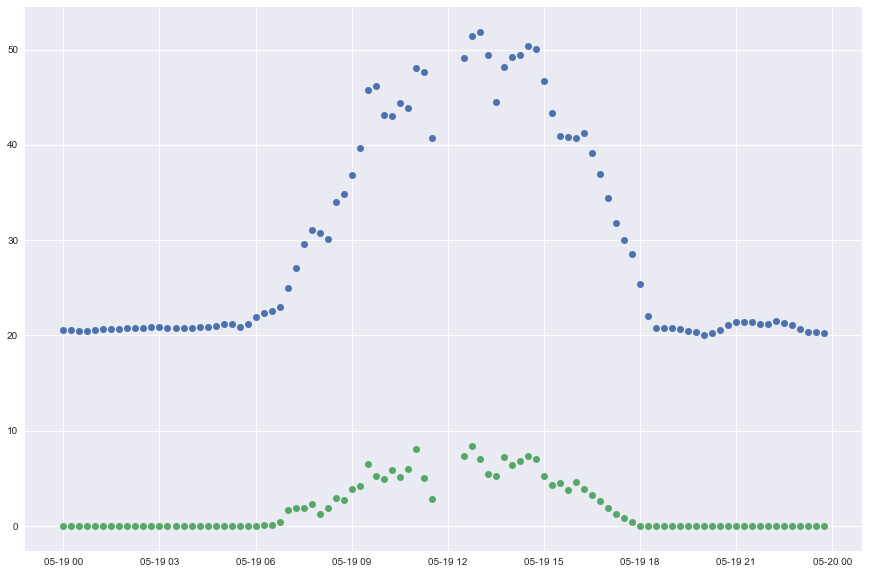

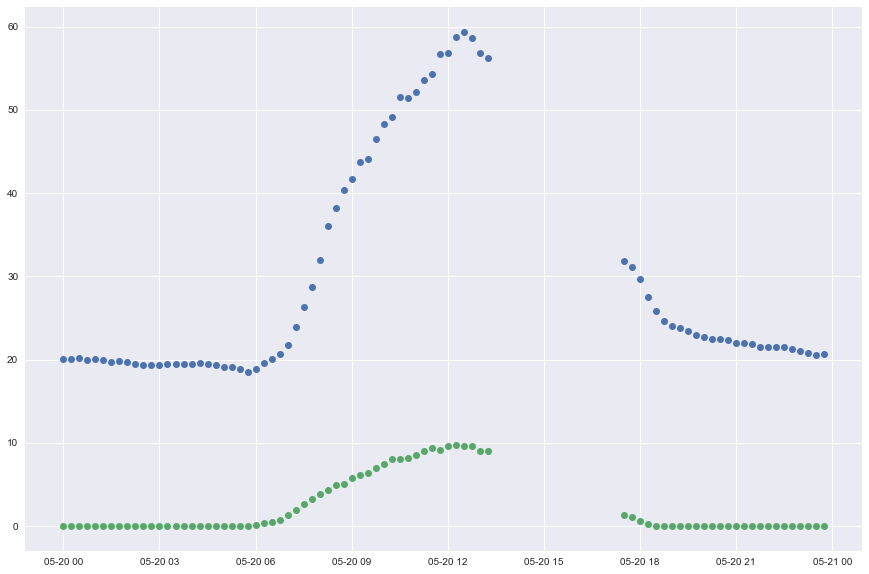

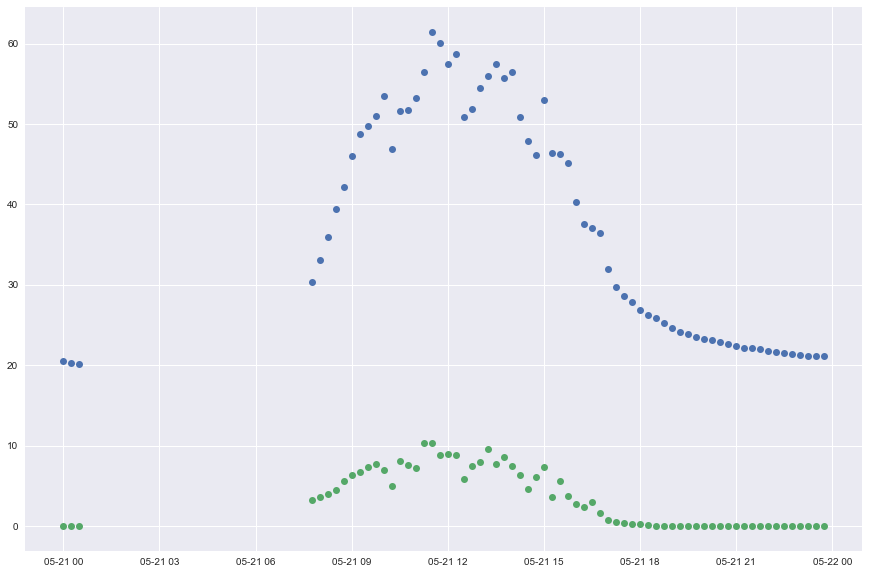

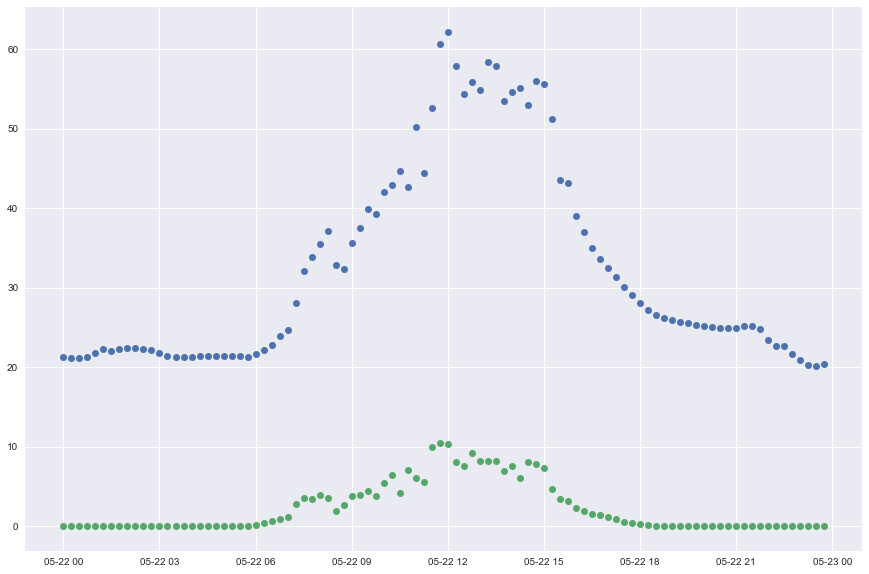

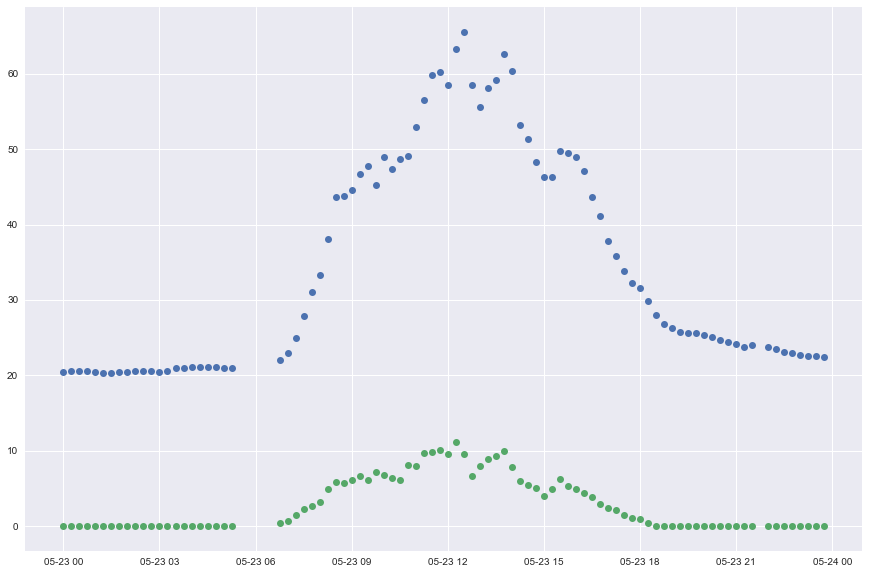

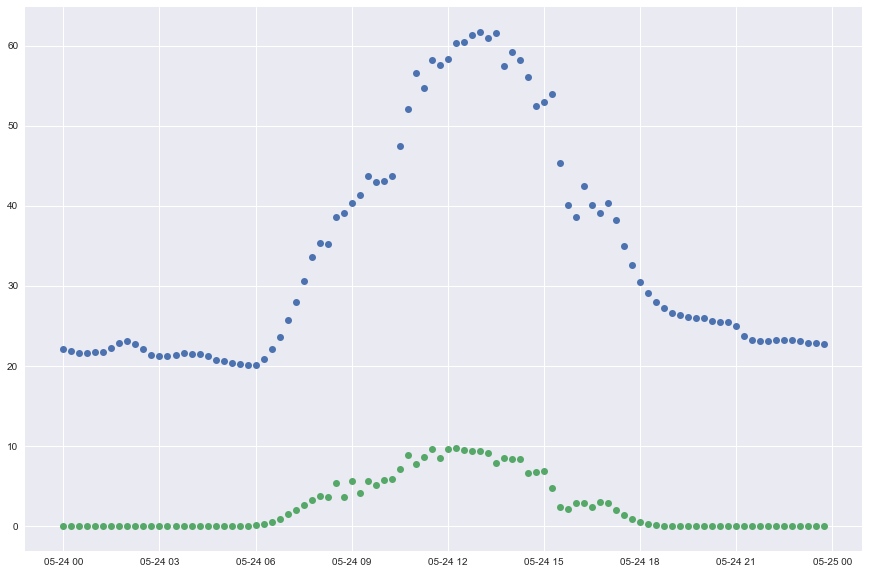

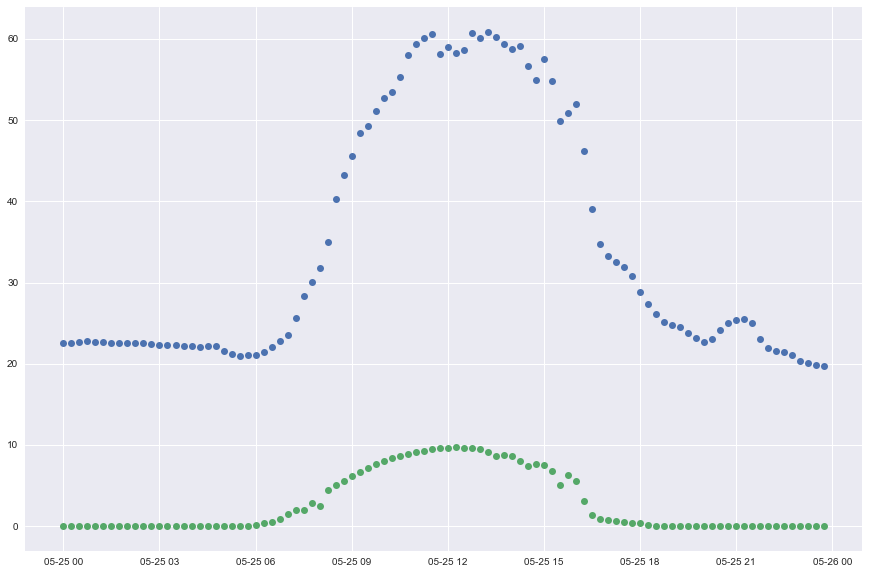

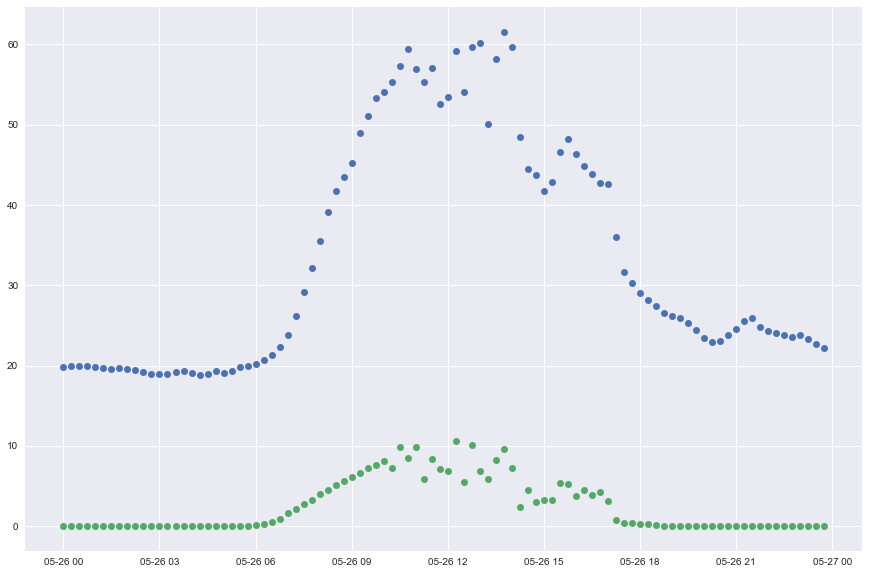

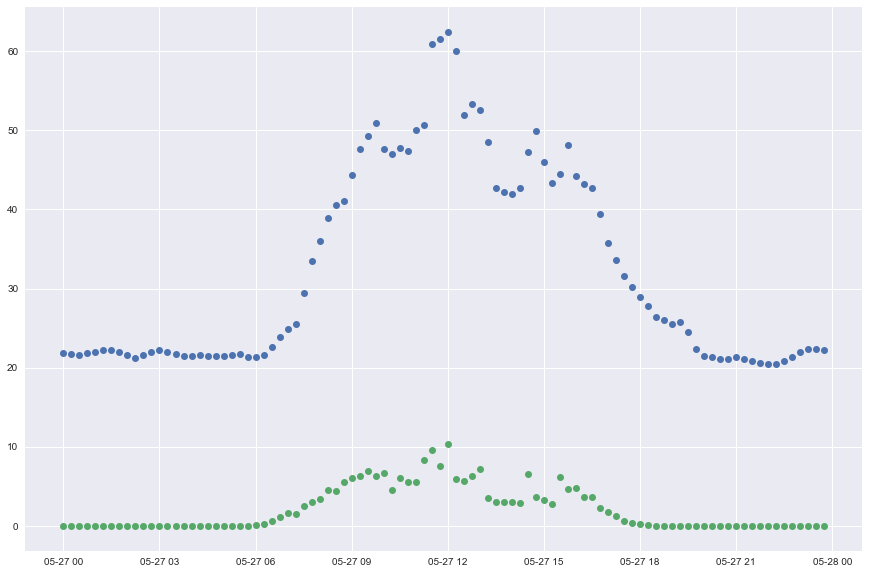

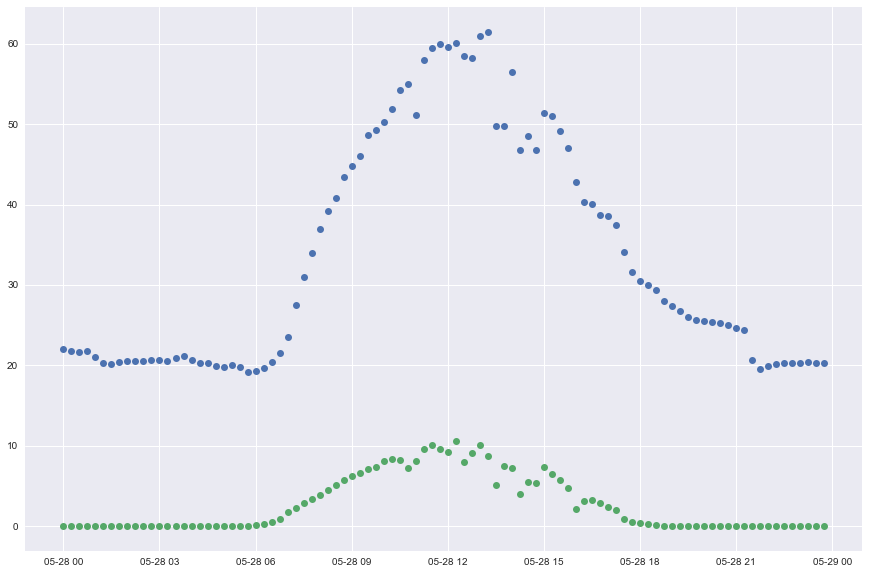

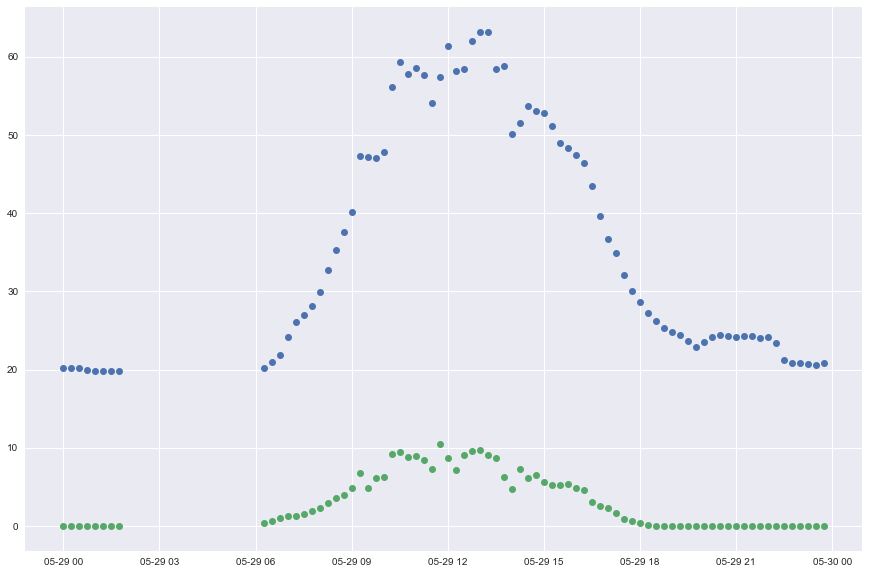

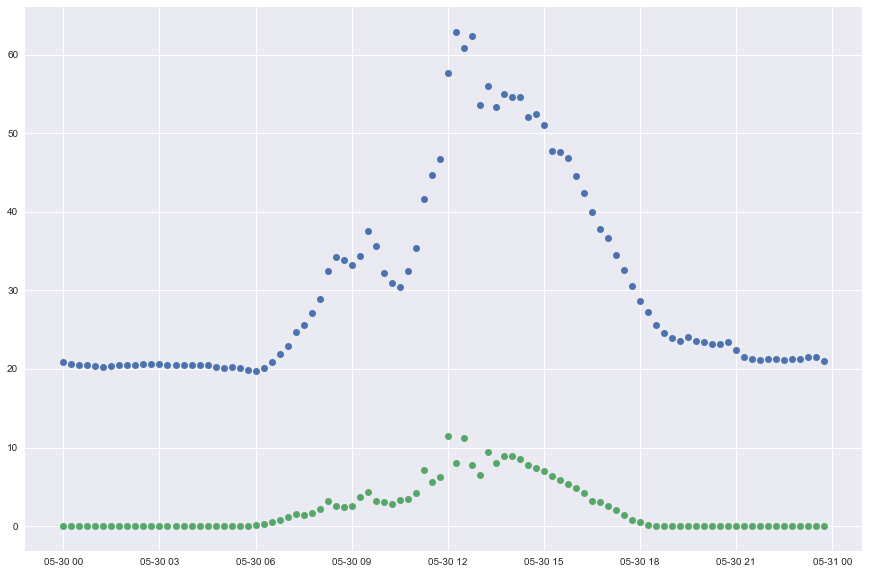

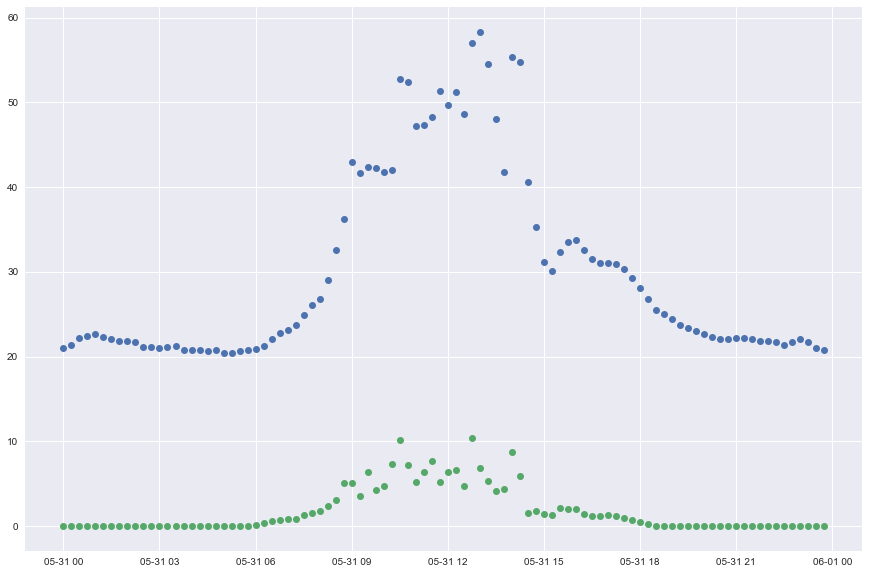

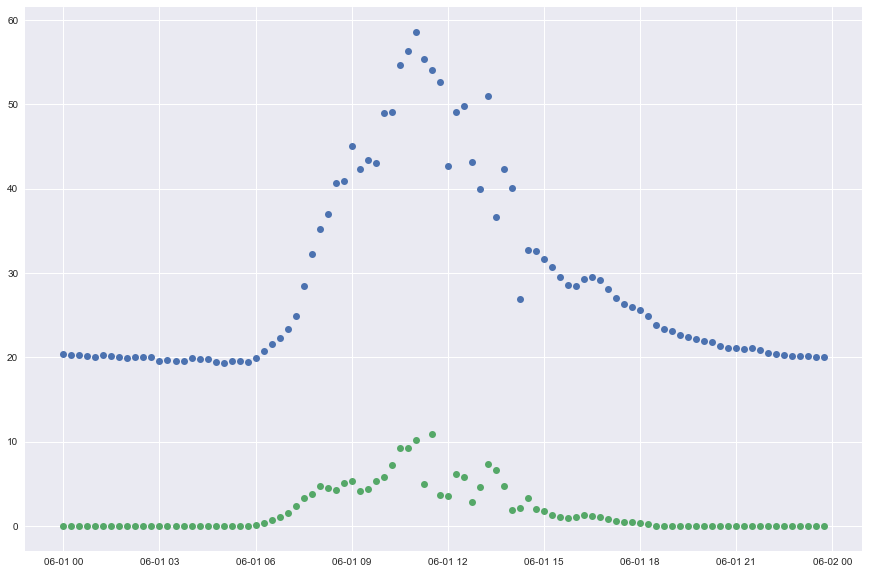

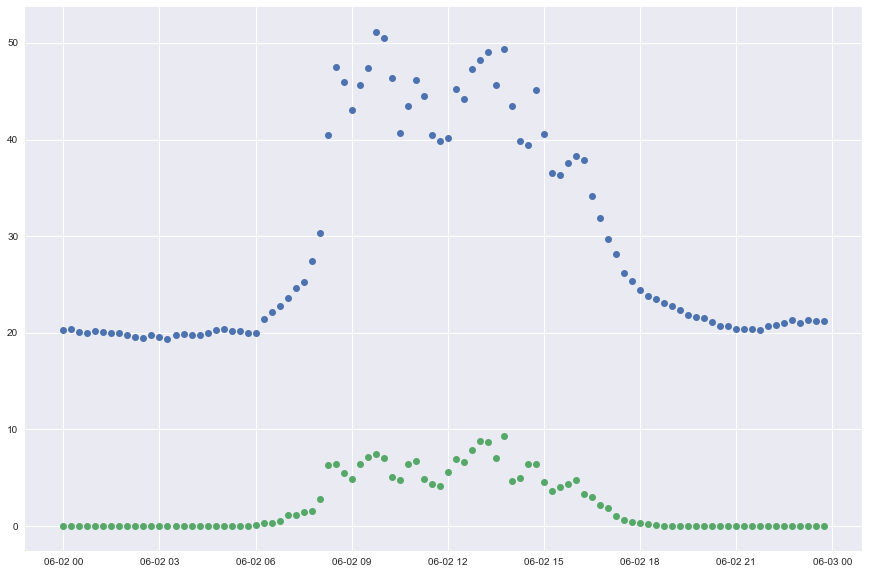

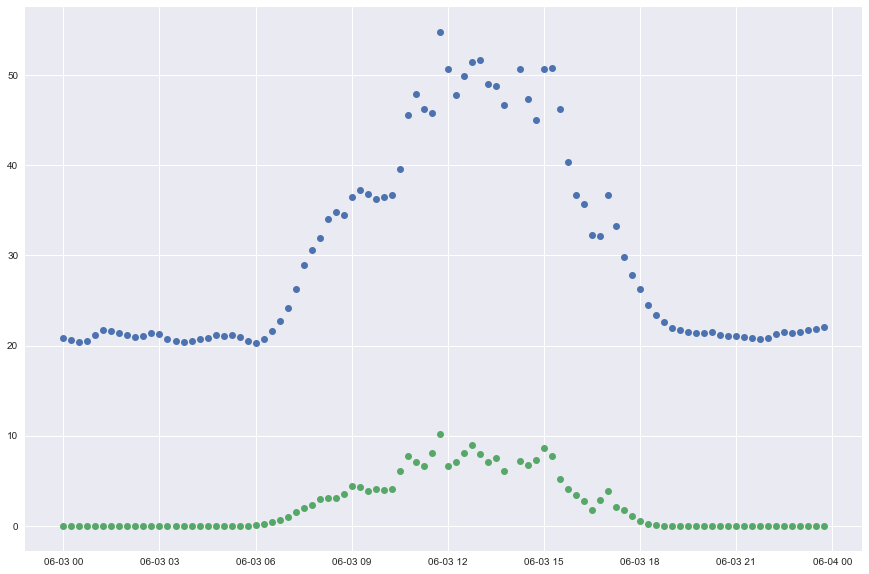

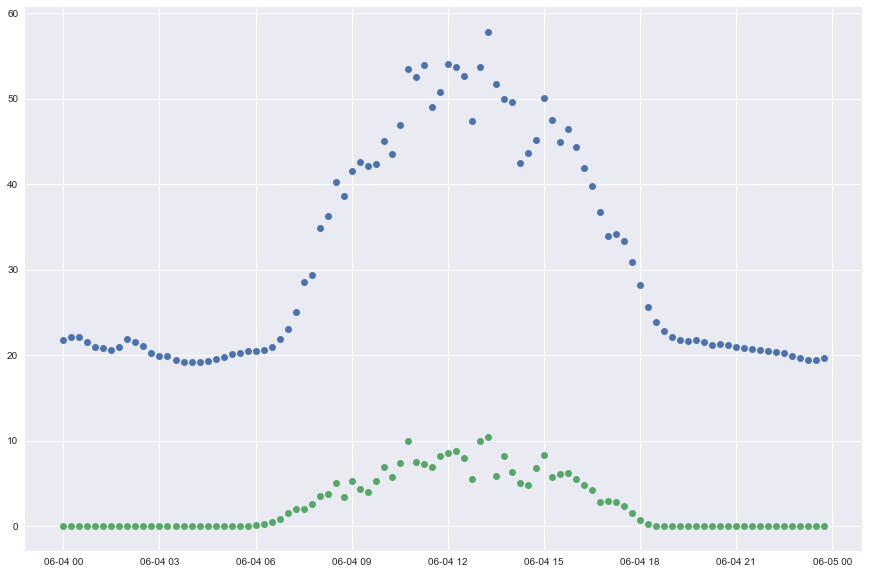

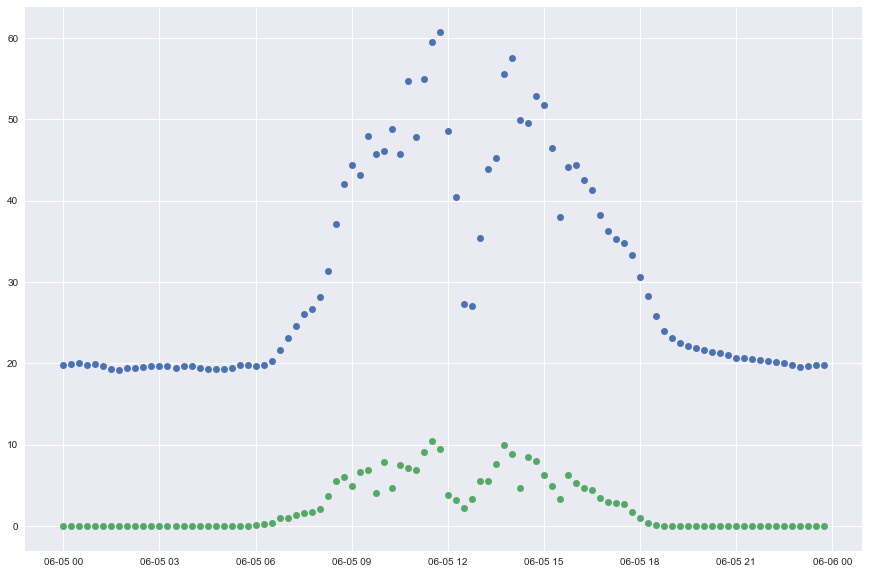

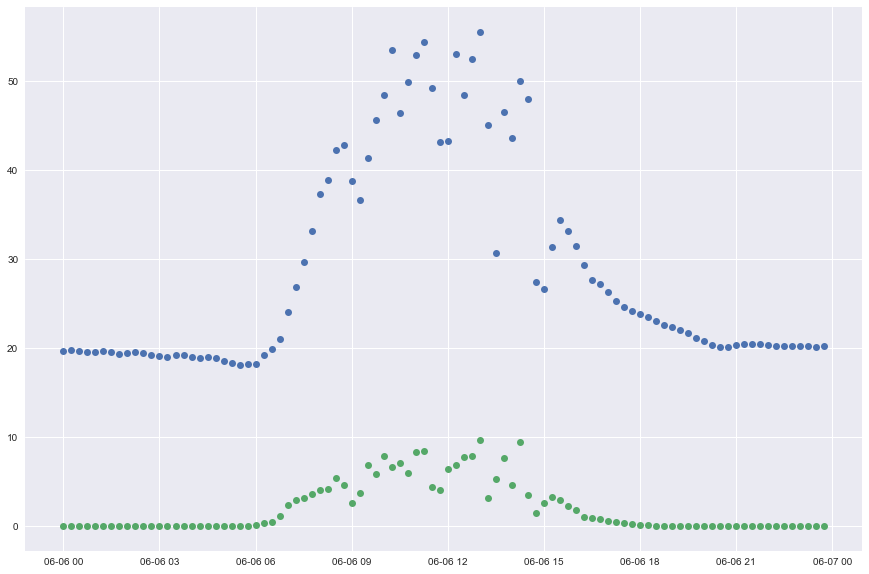

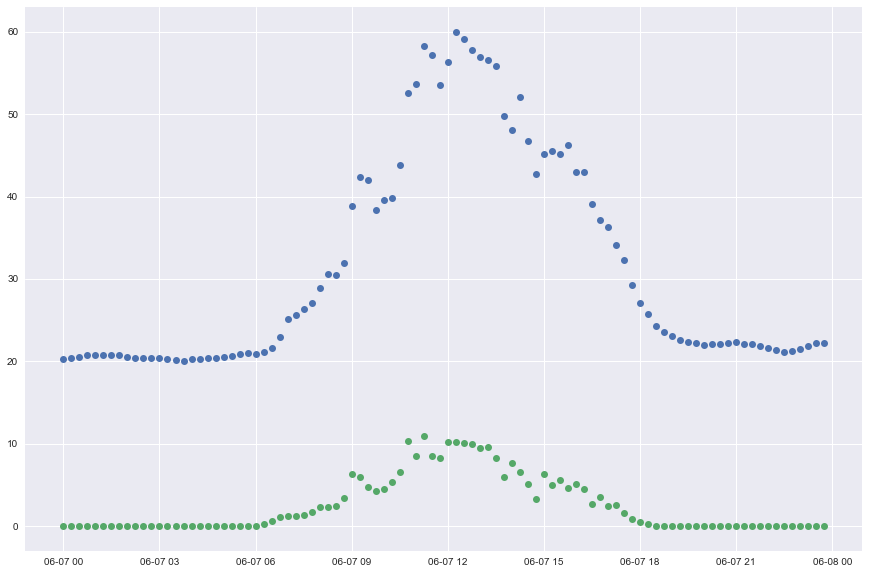

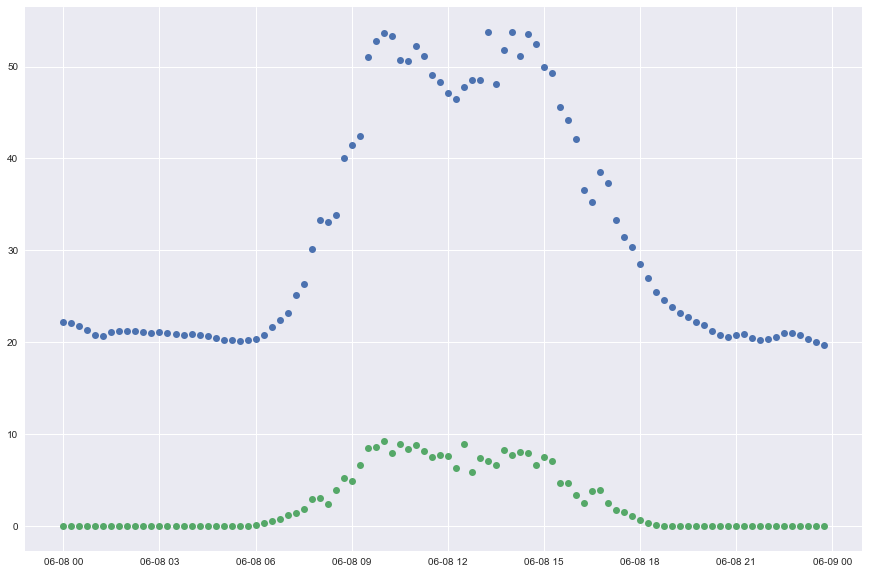

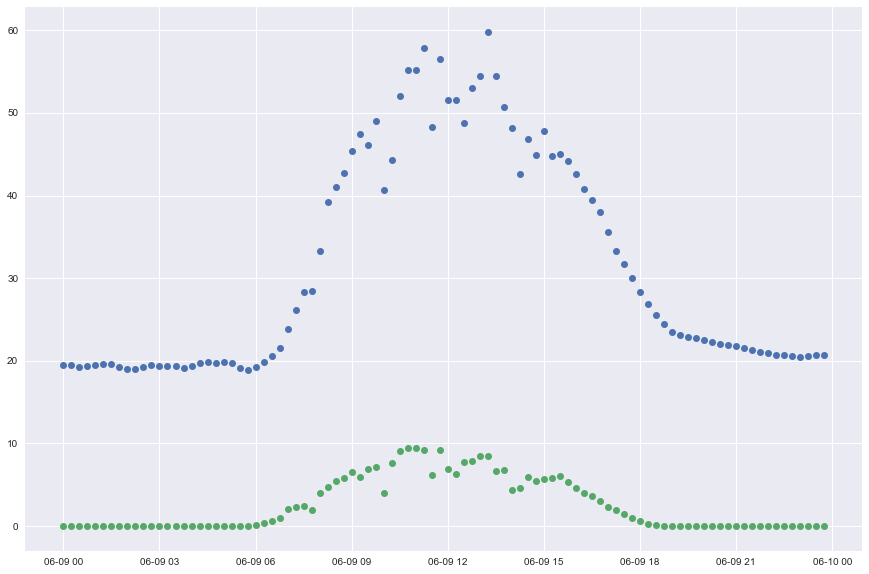

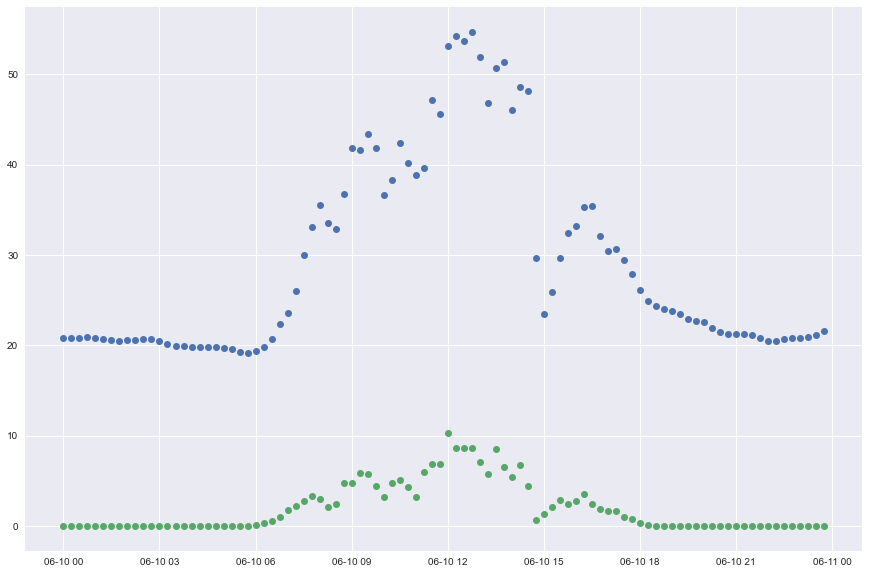

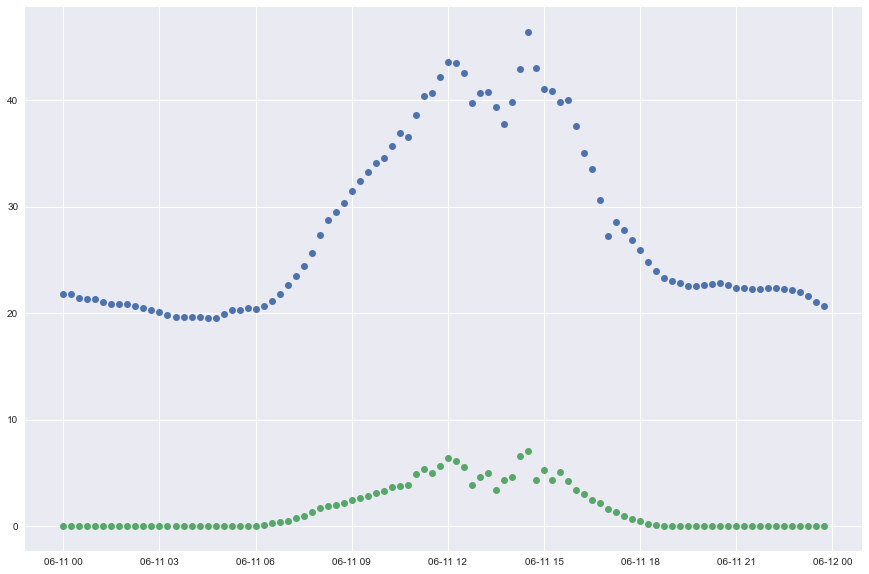

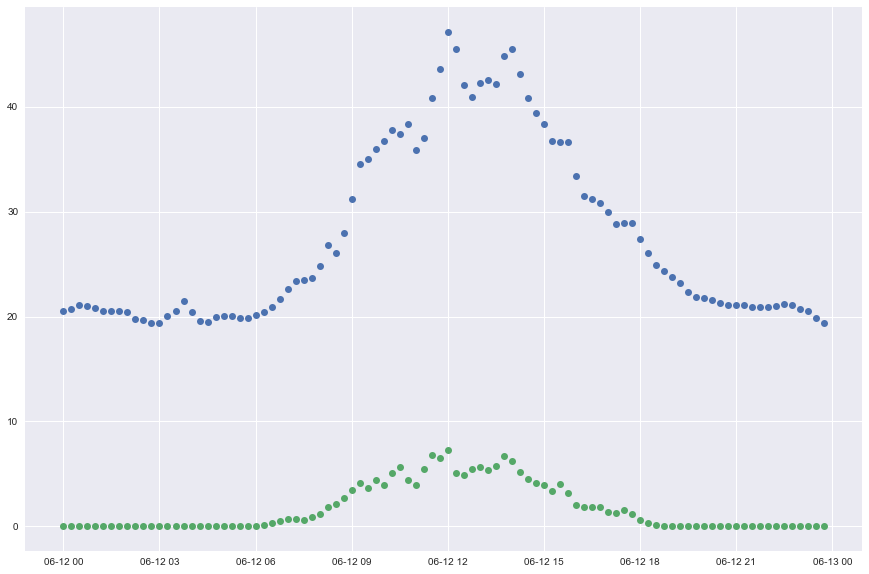

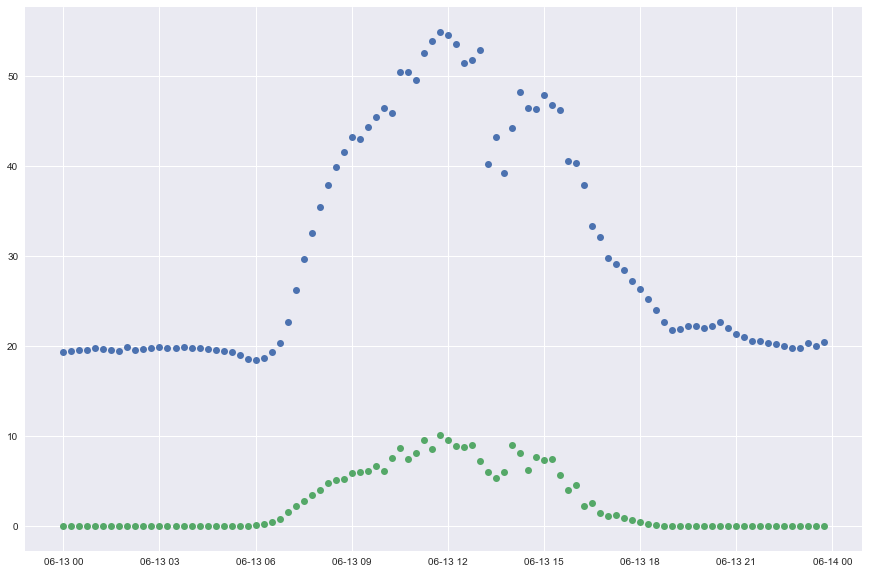

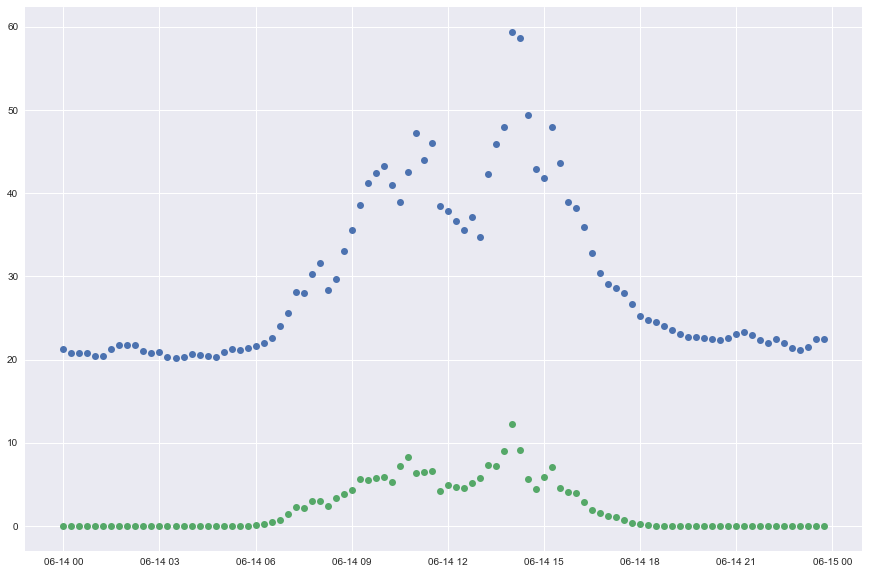

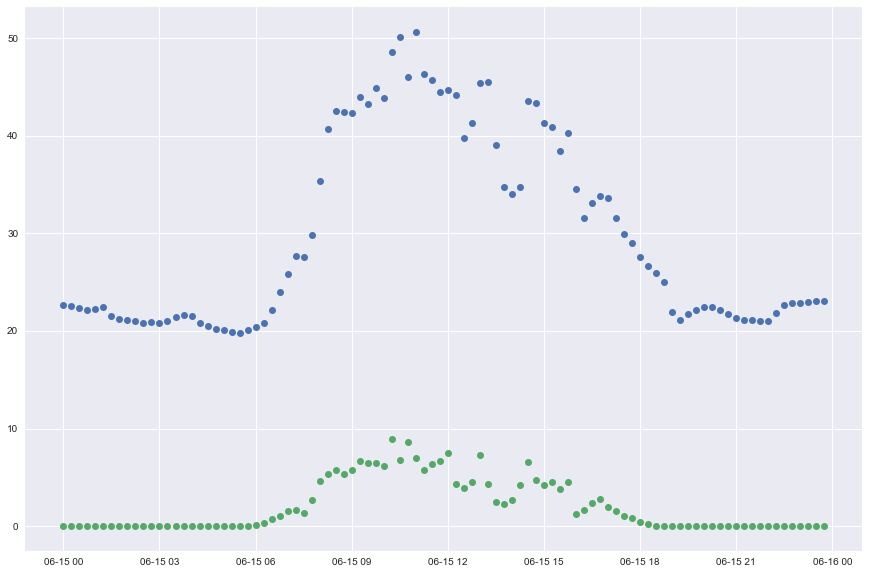

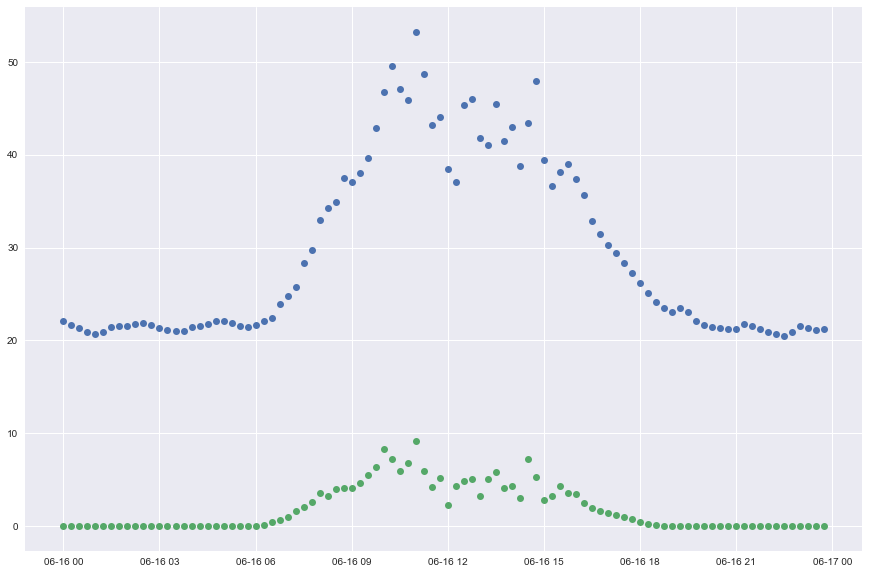

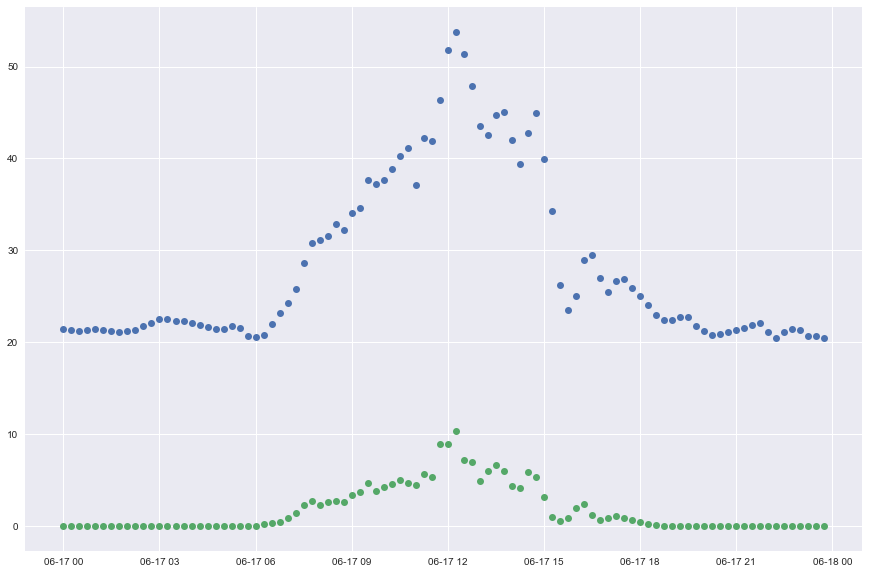

In [91]:
for _, gp in plant_1_weat.groupby(plant_1_weat['DATE_TIME'].dt.dayofyear):
    plt.figure(figsize=(15, 10))
    plt.plot_date(gp['DATE_TIME'], gp['MODULE_TEMPERATURE'])
    # Adjust IRRADIATION to make it visally clearer 
    plt.plot_date(gp['DATE_TIME'], (10 * gp['IRRADIATION']))
    plt.show()